# Import Libraries

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import json
import re
import os
import pandas_profiling
import seaborn as sns
import networkx as nx
import scipy.stats as ss
import itertools 

import nltk
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import Word

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier   
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler


# Change working directory

In [ ]:
path=r"\Data"
os.chdir(path)
#cwd = os.getcwd()
#cwd

# IMDB Movie Data 

In [65]:
df = pd.read_csv('OMdb_mojo_clean_with_budget_jz.csv')
df = df.query('Year > 1990')
df = df.drop(['overseas-gross','domestic-gross','BoxOffice'], axis=1)
sns.set(font_scale=1.5)
pandas_profiling.ProfileReport(df)

## Overview

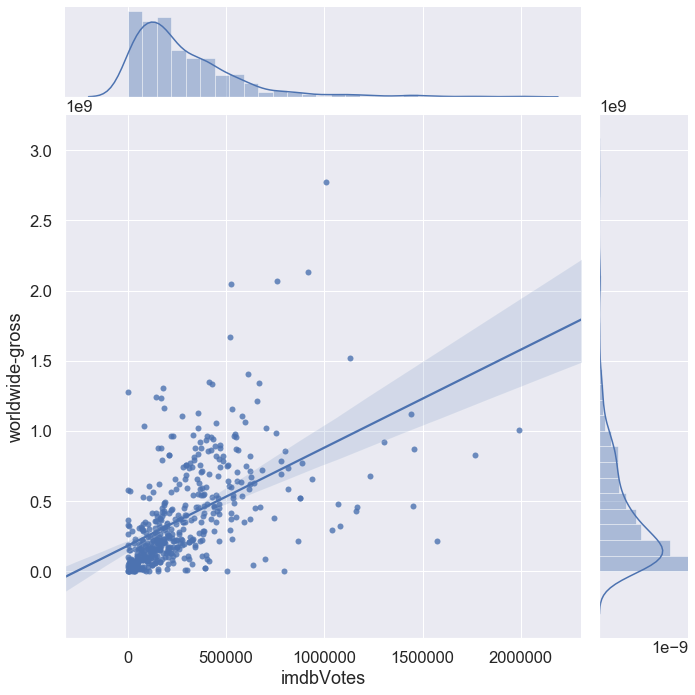

In [66]:
#popularity correlates with sales
sns.jointplot("imdbVotes", "worldwide-gross", data=df, kind="reg", color="b", height=10)

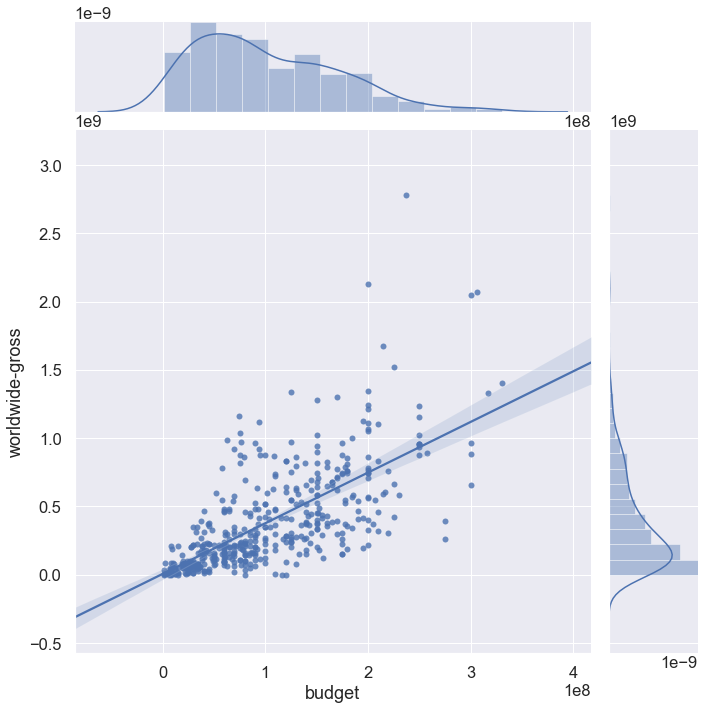

In [67]:
#budget correlates with sales
sns.jointplot("budget", "worldwide-gross", data=df, kind="reg", color="b", height=10)

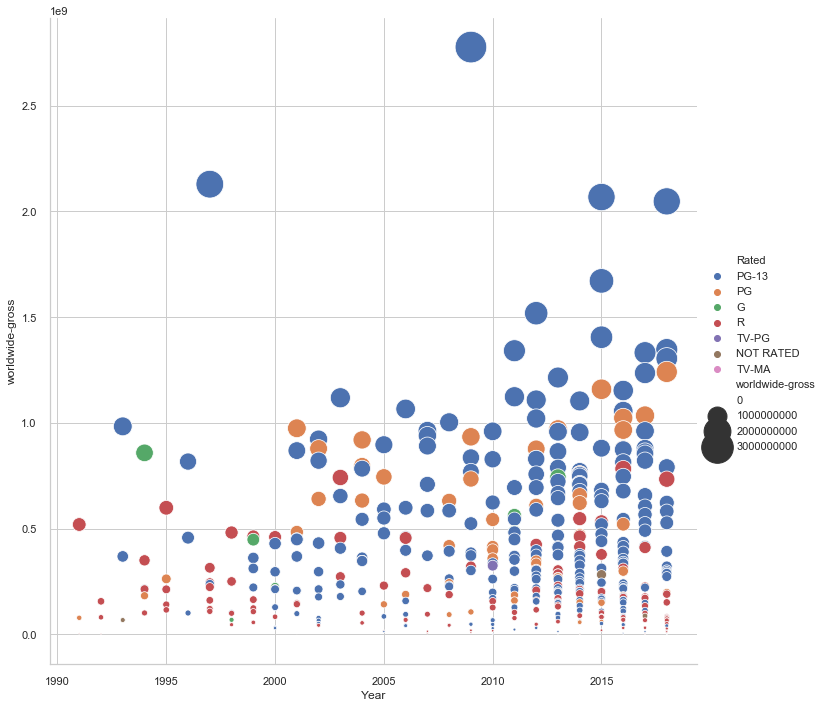

In [68]:
#Movie for Young adults
sns.set(style="whitegrid")
sns.relplot(x="Year", y="worldwide-gross", hue = "Rated", data=df, size = 'worldwide-gross', sizes =(0,1000), height=10)

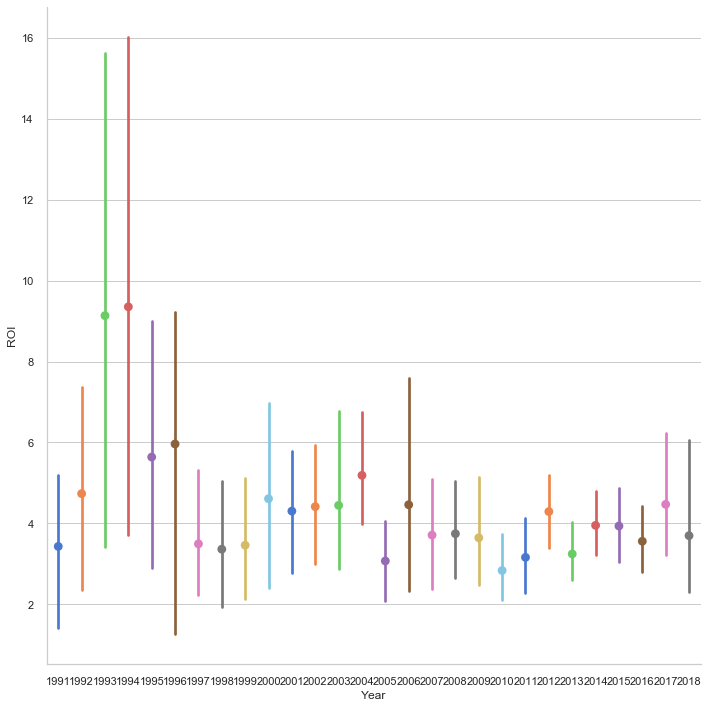

In [69]:
sns.catplot(x="Year", y="ROI", kind="point", data=df, height=10, palette="muted", rotation = '90',fontsize=100)

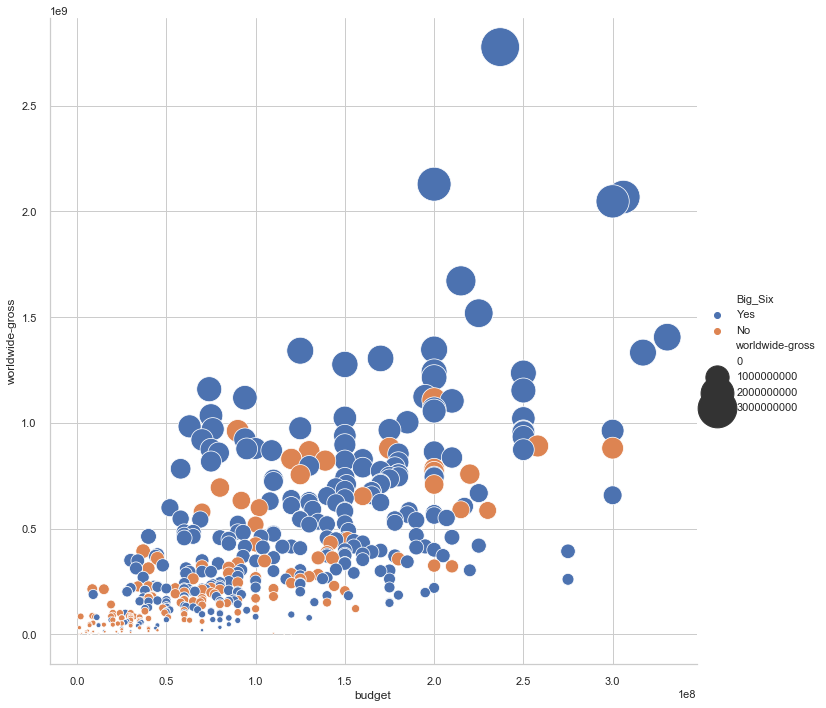

In [70]:
big_six = df.query('Big_Six == "Yes"')
sns.relplot(x='budget', y='worldwide-gross', hue='Big_Six',size = 'worldwide-gross', sizes =(0,1500), height=10,data = df)


## IMDB Gross Sales Prediction

In [103]:
movie_raw = pd.read_csv('OMdb_mojo_clean_with_budget_v2.csv')
# a quick overview of movie data
movie_raw.head()

movie_raw.describe()

movie_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 44 columns):
Actors             486 non-null object
Awards             425 non-null object
BoxOffice          340 non-null float64
Country            486 non-null object
DVD                467 non-null object
Director           486 non-null object
Genre              486 non-null object
IMdb_ID            486 non-null object
IMdb_score         486 non-null int64
Language           486 non-null object
Metascore          486 non-null float64
Plot               486 non-null object
Production         473 non-null object
RT_score           486 non-null float64
Rated              477 non-null object
Released           485 non-null object
Runtime            486 non-null int64
TMdb_id            486 non-null object
Title              486 non-null object
Type               486 non-null object
Website            416 non-null object
Year               486 non-null int64
actor_1            486 non-null objec

In [104]:
#check whole row duplicates 
numOfDuplicatedRows = movie_raw.duplicated(subset=None, keep='first').sum()

#drop duplicated rows 
movie_raw = movie_raw.drop_duplicates(subset=None, keep='first', inplace=False)
movie_raw=movie_raw.reset_index(drop=True)


#split genres
movie_raw.Genre.head()


# rename each variable is tags
movie_raw_split = movie_raw['Genre'].str.split(',',expand = True)
for i in range(0,movie_raw_split.shape[1]):
    movie_raw_split.iloc[:,i] = movie_raw_split.iloc[:,i].str.strip()
    
genre_types = []
for i in range(movie_raw_split.shape[1]):
    types = movie_raw_split.iloc[:,i].unique()
        
    for the_type in types:
        if the_type not in genre_types:
            genre_types.append(the_type)

genre_types = genre_types[0:19]+genre_types[20:22]

movie_raw['IMdb_score']=movie_raw['IMdb_score'].fillna('Unknown')
score_dict = {}

movie_type_count_and_score={}
for genre in genre_types:

    score = 0
    count = 0
    
    for i in range(movie_raw_split.shape[0]):
        if genre in list(movie_raw_split.iloc[i,:]):
            #print(genre,movie_raw['vote_average'][i])
            print(genre,movie_raw['IMdb_score'][i],i)

            if movie_raw['IMdb_score'][i]!='Unknown':
                score = score + movie_raw['IMdb_score'][i]
                count = count+1
                print(genre,score,count,i)
    score_dict[genre] = score/count
       
    
    movie_type_count_and_score[genre] = (score,count)
    
gross_dict={}
movie_raw['worldwide-gross']=movie_raw['worldwide-gross'].fillna('Unknown')
for genre in genre_types:
    gross = 0
    count = 0
    for i in range(movie_raw_split.shape[0]):
        if genre in list(movie_raw_split.iloc[i,:]):
            #print(genre,movie_raw['vote_average'][i])
            print(genre,movie_raw['worldwide-gross'][i],i)

            if movie_raw['worldwide-gross'][i]!='Unknown':
                gross = gross + movie_raw['worldwide-gross'][i]
                count = count+1
                print(genre,gross,count,i)
    gross_dict[genre] = gross/count
names = list(gross_dict.keys())

values = list(gross_dict.values())



Action 78 0
Action 78 1 0
Action 80 2
Action 158 2 2
Action 85 3
Action 243 3 3
Action 70 4
Action 313 4 4
Action 81 5
Action 394 5 5
Action 74 6
Action 468 6 6
Action 74 7
Action 542 7 7
Action 72 9
Action 614 8 9
Action 62 10
Action 676 9 10
Action 79 12
Action 755 10 12
Action 79 13
Action 834 11 13
Action 67 14
Action 901 12 14
Action 72 15
Action 973 13 15
Action 64 16
Action 1037 14 16
Action 78 17
Action 1115 15 17
Action 63 18
Action 1178 16 18
Action 89 19
Action 1267 17 19
Action 78 20
Action 1345 18 20
Action 57 21
Action 1402 19 21
Action 73 22
Action 1475 20 22
Action 78 23
Action 1553 21 23
Action 63 24
Action 1616 22 24
Action 90 27
Action 1706 23 27
Action 71 32
Action 1777 24 32
Action 70 33
Action 1847 25 33
Action 62 42
Action 1909 26 42
Action 68 43
Action 1977 27 43
Action 75 44
Action 2052 28 44
Action 65 48
Action 2117 29 48
Action 75 50
Action 2192 30 50
Action 77 51
Action 2269 31 51
Action 79 53
Action 2348 32 53
Action 60 54
Action 2408 33 54
Action 88 57
Act

Drama 76 255
Drama 3647 49 255
Drama 70 257
Drama 3717 50 257
Drama 62 261
Drama 3779 51 261
Drama 70 263
Drama 3849 52 263
Drama 78 264
Drama 3927 53 264
Drama 63 266
Drama 3990 54 266
Drama 69 268
Drama 4059 55 268
Drama 72 269
Drama 4131 56 269
Drama 89 271
Drama 4220 57 271
Drama 84 273
Drama 4304 58 273
Drama 76 274
Drama 4380 59 274
Drama 64 278
Drama 4444 60 278
Drama 63 279
Drama 4507 61 279
Drama 71 280
Drama 4578 62 280
Drama 79 283
Drama 4657 63 283
Drama 75 287
Drama 4732 64 287
Drama 78 290
Drama 4810 65 290
Drama 75 293
Drama 4885 66 293
Drama 76 296
Drama 4961 67 296
Drama 81 301
Drama 5042 68 301
Drama 76 302
Drama 5118 69 302
Drama 69 317
Drama 5187 70 317
Drama 71 318
Drama 5258 71 318
Drama 75 321
Drama 5333 72 321
Drama 63 323
Drama 5396 73 323
Drama 66 324
Drama 5462 74 324
Drama 68 328
Drama 5530 75 328
Drama 68 333
Drama 5598 76 333
Drama 62 335
Drama 5660 77 335
Drama 71 343
Drama 5731 78 343
Drama 82 346
Drama 5813 79 346
Drama 78 352
Drama 5891 80 352
Drama 71

Adventure 10937 151 179
Adventure 59 182
Adventure 10996 152 182
Adventure 64 184
Adventure 11060 153 184
Adventure 53 185
Adventure 11113 154 185
Adventure 63 187
Adventure 11176 155 187
Adventure 77 188
Adventure 11253 156 188
Adventure 72 189
Adventure 11325 157 189
Adventure 64 190
Adventure 11389 158 190
Adventure 69 192
Adventure 11458 159 192
Adventure 71 194
Adventure 11529 160 194
Adventure 66 195
Adventure 11595 161 195
Adventure 58 196
Adventure 11653 162 196
Adventure 60 197
Adventure 11713 163 197
Adventure 65 198
Adventure 11778 164 198
Adventure 76 199
Adventure 11854 165 199
Adventure 87 201
Adventure 11941 166 201
Adventure 53 202
Adventure 11994 167 202
Adventure 83 203
Adventure 12077 168 203
Adventure 66 207
Adventure 12143 169 207
Adventure 73 208
Adventure 12216 170 208
Adventure 59 210
Adventure 12275 171 210
Adventure 58 211
Adventure 12333 172 211
Adventure 58 212
Adventure 12391 173 212
Adventure 77 213
Adventure 12468 174 213
Adventure 62 214
Adventure 12530 

Comedy 509 7 33
Comedy 72 40
Comedy 581 8 40
Comedy 66 46
Comedy 647 9 46
Comedy 65 47
Comedy 712 10 47
Comedy 77 51
Comedy 789 11 51
Comedy 79 53
Comedy 868 12 53
Comedy 80 66
Comedy 948 13 66
Comedy 81 68
Comedy 1029 14 68
Comedy 73 76
Comedy 1102 15 76
Comedy 83 78
Comedy 1185 16 78
Comedy 78 79
Comedy 1263 17 79
Comedy 78 92
Comedy 1341 18 92
Comedy 76 98
Comedy 1417 19 98
Comedy 72 101
Comedy 1489 20 101
Comedy 78 102
Comedy 1567 21 102
Comedy 68 108
Comedy 1635 22 108
Comedy 62 116
Comedy 1697 23 116
Comedy 77 122
Comedy 1774 24 122
Comedy 71 128
Comedy 1845 25 128
Comedy 73 130
Comedy 1918 26 130
Comedy 69 132
Comedy 1987 27 132
Comedy 79 133
Comedy 2066 28 133
Comedy 65 136
Comedy 2131 29 136
Comedy 78 139
Comedy 2209 30 139
Comedy 77 162
Comedy 2286 31 162
Comedy 68 164
Comedy 2354 32 164
Comedy 53 185
Comedy 2407 33 185
Comedy 64 190
Comedy 2471 34 190
Comedy 58 196
Comedy 2529 35 196
Comedy 65 198
Comedy 2594 36 198
Comedy 66 207
Comedy 2660 37 207
Comedy 62 216
Comedy 2722 

Sci-Fi 55 262
Sci-Fi 8619 124 262
Sci-Fi 58 275
Sci-Fi 8677 125 275
Sci-Fi 58 282
Sci-Fi 8735 126 282
Sci-Fi 58 297
Sci-Fi 8793 127 297
Sci-Fi 57 298
Sci-Fi 8850 128 298
Sci-Fi 43 307
Sci-Fi 8893 129 307
Sci-Fi 58 308
Sci-Fi 8951 130 308
Sci-Fi 62 312
Sci-Fi 9013 131 312
Sci-Fi 56 313
Sci-Fi 9069 132 313
Sci-Fi 67 334
Sci-Fi 9136 133 334
Sci-Fi 71 339
Sci-Fi 9207 134 339
Sci-Fi 64 340
Sci-Fi 9271 135 340
Sci-Fi 72 344
Sci-Fi 9343 136 344
Sci-Fi 57 348
Sci-Fi 9400 137 348
Sci-Fi 52 350
Sci-Fi 9452 138 350
Sci-Fi 57 354
Sci-Fi 9509 139 354
Sci-Fi 68 357
Sci-Fi 9577 140 357
Sci-Fi 58 358
Sci-Fi 9635 141 358
Sci-Fi 63 359
Sci-Fi 9698 142 359
Sci-Fi 61 363
Sci-Fi 9759 143 363
Sci-Fi 60 367
Sci-Fi 9819 144 367
Sci-Fi 57 378
Sci-Fi 9876 145 378
Sci-Fi 60 383
Sci-Fi 9936 146 383
Sci-Fi 56 384
Sci-Fi 9992 147 384
Sci-Fi 79 389
Sci-Fi 10071 148 389
Sci-Fi 63 405
Sci-Fi 10134 149 405
Sci-Fi 71 411
Sci-Fi 10205 150 411
Sci-Fi 56 421
Sci-Fi 10261 151 421
Sci-Fi 57 422
Sci-Fi 10318 152 422
Sci-Fi 24

Thriller 76 371
Thriller 9975 146 371
Thriller 63 372
Thriller 10038 147 372
Thriller 66 373
Thriller 10104 148 373
Thriller 76 374
Thriller 10180 149 374
Thriller 43 375
Thriller 10223 150 375
Thriller 53 377
Thriller 10276 151 377
Thriller 57 378
Thriller 10333 152 378
Thriller 70 382
Thriller 10403 153 382
Thriller 68 386
Thriller 10471 154 386
Thriller 71 387
Thriller 10542 155 387
Thriller 79 389
Thriller 10621 156 389
Thriller 73 391
Thriller 10694 157 391
Thriller 74 395
Thriller 10768 158 395
Thriller 62 396
Thriller 10830 159 396
Thriller 61 398
Thriller 10891 160 398
Thriller 67 399
Thriller 10958 161 399
Thriller 73 402
Thriller 11031 162 402
Thriller 63 405
Thriller 11094 163 405
Thriller 65 407
Thriller 11159 164 407
Thriller 65 410
Thriller 11224 165 410
Thriller 71 411
Thriller 11295 166 411
Thriller 76 412
Thriller 11371 167 412
Thriller 56 421
Thriller 11427 168 421
Thriller 57 422
Thriller 11484 169 422
Thriller 45 423
Thriller 11529 170 423
Thriller 65 424
Thriller 1

Action 114908111887 199 265
Action 217100000 266
Action 115125211887 200 266
Action 217000000 267
Action 115342211887 201 267
Action 215900000 268
Action 115558111887 202 268
Action 215300000 269
Action 115773411887 203 269
Action 214000000 270
Action 115987411887 204 270
Action 213500000 272
Action 116200911887 205 272
Action 211800000 274
Action 116412711887 206 274
Action 211800000 275
Action 116624511887 207 275
Action 208100000 276
Action 116832611887 208 276
Action 207300000 277
Action 117039911887 209 277
Action 205400000 278
Action 117245311887 210 278
Action 203600000 279
Action 117448911887 211 279
Action 203400000 280
Action 117652311887 212 280
Action 203300000 281
Action 117855611887 213 281
Action 202000000 282
Action 118057611887 214 282
Action 199000000 285
Action 118256611887 215 285
Action 192300000 288
Action 118448911887 216 288
Action 190400000 289
Action 118639311887 217 289
Action 190300000 290
Action 118829611887 218 290
Action 188100000 292
Action 119017711887 

Drama 33139900000 67 296
Drama 175300000 301
Drama 33315200000 68 301
Drama 173600000 302
Drama 33488800000 69 302
Drama 157100000 317
Drama 33645900000 70 317
Drama 156800000 318
Drama 33802700000 71 318
Drama 154800000 321
Drama 33957500000 72 321
Drama 151800000 323
Drama 34109300000 73 323
Drama 151600000 324
Drama 34260900000 74 324
Drama 148700000 328
Drama 34409600000 75 328
Drama 141400000 333
Drama 34551000000 76 333
Drama 135500000 335
Drama 34686500000 77 335
Drama 121800000 343
Drama 34808300000 78 343
Drama 116100000 346
Drama 34924400000 79 346
Drama 109400000 352
Drama 35033800000 80 352
Drama 107800000 353
Drama 35141600000 81 353
Drama 104400000 355
Drama 35246000000 82 355
Drama 102100000 357
Drama 35348100000 83 357
Drama 100900000 360
Drama 35449000000 84 360
Drama 95700000 364
Drama 35544700000 85 364
Drama 95000000 366
Drama 35639700000 86 366
Drama 93900000 367
Drama 35733600000 87 367
Drama 85400000 371
Drama 35819000000 88 371
Drama 85200000 373
Drama 359042000

Adventure 474000000 138
Adventure 102724304184 120 138
Adventure 469200000 139
Adventure 103193504184 121 139
Adventure 467400000 140
Adventure 103660904184 122 140
Adventure 460600000 143
Adventure 104121504184 123 143
Adventure 459400000 144
Adventure 104580904184 124 144
Adventure 457700000 145
Adventure 105038604184 125 145
Adventure 449300000 149
Adventure 105487904184 126 149
Adventure 448200000 151
Adventure 105936104184 127 151
Adventure 440600000 152
Adventure 106376704184 128 152
Adventure 433700000 153
Adventure 106810404184 129 153
Adventure 432000000 154
Adventure 107242404184 130 154
Adventure 429600000 155
Adventure 107672004184 131 155
Adventure 419700000 157
Adventure 108091704184 132 157
Adventure 415900000 158
Adventure 108507604184 133 158
Adventure 415700000 159
Adventure 108923304184 134 159
Adventure 414800000 161
Adventure 109338104184 135 161
Adventure 414400000 162
Adventure 109752504184 136 162
Adventure 411000000 163
Adventure 110163504184 137 163
Adventure 

Animation 1241400000 12
Animation 1241400000 1 12
Animation 1241400000 13
Animation 2482800000 2 13
Animation 1159400000 16
Animation 3642200000 3 16
Animation 1034800000 24
Animation 4677000000 4 24
Animation 1023800000 25
Animation 5700800000 5 25
Animation 970800000 30
Animation 6671600000 6 30
Animation 919800000 40
Animation 7591400000 7 40
Animation 877200000 46
Animation 8468600000 8 46
Animation 875500000 47
Animation 9344100000 9 47
Animation 858600000 52
Animation 10202700000 10 52
Animation 744200000 76
Animation 10946900000 11 76
Animation 735100000 78
Animation 11682000000 12 78
Animation 657800000 92
Animation 12339800000 13 92
Animation 633000000 97
Animation 12972800000 14 97
Animation 631700000 98
Animation 13604500000 15 98
Animation 621500000 102
Animation 14226000000 16 102
Animation 562100000 116
Animation 14788100000 17 116
Animation 543100000 122
Animation 15331200000 18 122
Animation 521200000 128
Animation 15852400000 19 128
Animation 484600000 132
Animation 16

Comedy 32144000000 68 333
Comedy 134900000 336
Comedy 32278900000 69 336
Comedy 131900000 337
Comedy 32410800000 70 337
Comedy 122400000 342
Comedy 32533200000 71 342
Comedy 109800000 351
Comedy 32643000000 72 351
Comedy 107800000 353
Comedy 32750800000 73 353
Comedy 101400000 359
Comedy 32852200000 74 359
Comedy 100900000 360
Comedy 32953100000 75 360
Comedy 100000000 362
Comedy 33053100000 76 362
Comedy 98400000 363
Comedy 33151500000 77 363
Comedy 93900000 367
Comedy 33245400000 78 367
Comedy 83600000 376
Comedy 33329000000 79 376
Comedy 81100000 381
Comedy 33410100000 80 381
Comedy 78656813 383
Comedy 33488756813 81 383
Comedy 78300000 384
Comedy 33567056813 82 384
Comedy 77700000 385
Comedy 33644756813 83 385
Comedy 75300000 388
Comedy 33720056813 84 388
Comedy 69100000 392
Comedy 33789156813 85 392
Comedy 61399552 400
Comedy 33850556365 86 400
Comedy 60800000 403
Comedy 33911356365 87 403
Comedy 56900000 406
Comedy 33968256365 88 406
Comedy 51700000 409
Comedy 34019956365 89 409


Family 521200000 128
Family 27112200000 32 128
Family 484600000 132
Family 27596800000 33 132
Family 484400000 133
Family 28081200000 34 133
Family 469200000 139
Family 28550400000 35 139
Family 448200000 151
Family 28998600000 36 151
Family 419700000 157
Family 29418300000 37 157
Family 415700000 159
Family 29834000000 38 159
Family 372200000 178
Family 30206200000 39 178
Family 359100000 186
Family 30565300000 40 186
Family 348800000 190
Family 30914100000 41 190
Family 347500000 192
Family 31261600000 42 192
Family 335300000 196
Family 31596900000 43 196
Family 325300000 201
Family 31922200000 44 201
Family 306900000 208
Family 32229100000 45 208
Family 299500000 214
Family 32528600000 46 214
Family 299300000 215
Family 32827900000 47 215
Family 268400000 230
Family 33096300000 48 230
Family 262800000 233
Family 33359100000 49 233
Family 262000000 234
Family 33621100000 50 234
Family 242000000 244
Family 33863100000 51 244
Family 226900000 254
Family 34090000000 52 254
Family 224800

War 30900000 425
War 6430100000 24 425
Thriller 1236000000 14
Thriller 1236000000 1 14
Thriller 1108600000 20
Thriller 2344600000 2 20
Thriller 1003000000 27
Thriller 3347600000 3 27
Thriller 983800000 28
Thriller 4331400000 4 28
Thriller 880700000 43
Thriller 5212100000 5 43
Thriller 865000000 50
Thriller 6077100000 6 50
Thriller 828300000 57
Thriller 6905400000 7 57
Thriller 791000000 63
Thriller 7696400000 8 63
Thriller 788700000 64
Thriller 8485100000 9 64
Thriller 755400000 72
Thriller 9240500000 10 72
Thriller 747900000 73
Thriller 9988400000 11 73
Thriller 723200000 80
Thriller 10711600000 12 80
Thriller 714300000 81
Thriller 11425900000 13 81
Thriller 694700000 85
Thriller 12120600000 14 85
Thriller 694400000 86
Thriller 12815000000 15 86
Thriller 682700000 87
Thriller 13497700000 16 87
Thriller 653400000 94
Thriller 14151100000 17 94
Thriller 599000000 105
Thriller 14750100000 18 105
Thriller 591700000 107
Thriller 15341800000 19 107
Thriller 586100000 109
Thriller 15927900000

Mystery 545400000 119
Mystery 9182900000 10 119
Mystery 524000000 127
Mystery 9706900000 11 127
Mystery 368900000 181
Mystery 10075800000 12 181
Mystery 348300000 191
Mystery 10424100000 13 191
Mystery 347500000 192
Mystery 10771600000 14 192
Mystery 347200000 193
Mystery 11118800000 15 193
Mystery 334900000 198
Mystery 11453700000 16 198
Mystery 288900000 221
Mystery 11742600000 17 221
Mystery 286200000 223
Mystery 12028800000 18 223
Mystery 261300000 236
Mystery 12290100000 19 236
Mystery 250600000 239
Mystery 12540700000 20 239
Mystery 230900000 249
Mystery 12771600000 21 249
Mystery 220000000 261
Mystery 12991600000 22 261
Mystery 214000000 270
Mystery 13205600000 23 270
Mystery 185800000 293
Mystery 13391400000 24 293
Mystery 179200000 298
Mystery 13570600000 25 298
Mystery 137300000 334
Mystery 13707900000 26 334
Mystery 109400000 352
Mystery 13817300000 27 352
Mystery 104400000 355
Mystery 13921700000 28 355
Mystery 100000000 361
Mystery 14021700000 29 361
Mystery 95700000 364
M

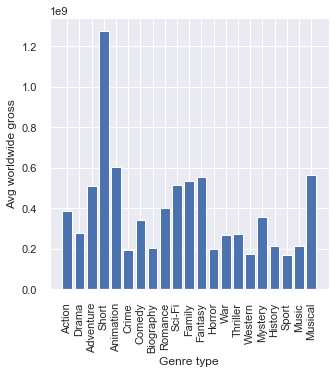

In [105]:
#tick_label does the some work as plt.xticks()

plt.bar(range(len(gross_dict)),values,tick_label=names)
plt.xticks(rotation=90)
plt.ylabel("Avg worldwide gross")
plt.xlabel("Genre type")
plt.savefig('Genres_gross.png')
plt.show()

In [106]:
movie_raw['CHWH'] =''

for i in range(movie_raw_split.shape[0]):
    thelist = movie_raw_split.iloc[i,:].tolist()
    if 'Crime' in thelist or 'Horor' in thelist or 'Western' in thelist or 'History' in thelist:
        movie_raw.loc[i,'CHWH'] = 1
    else:
        movie_raw.loc[i,'CHWH'] = 0

# genre can be removed from feature list
#movie_new = movie_raw.drop('Genre', 1)
movie_new = movie_raw

#actors 
unique_actors = list(set(movie_new['actor_1']))
unique_actors = unique_actors+list(set(movie_new['actor_2']))
#num of unique actors
unique_actor_per_movie = len(unique_actors)/movie_new.shape[0]
movie_per_actor = movie_new.shape[0]/len(unique_actors)
#directors
unique_directors = list(set(movie_new['director_1']))
unique_directors = unique_actors+list(set(movie_new['director_2']))
#num of unique actors
unique_director_per_movie = len(unique_directors)/movie_new.shape[0]
movie_per_director = movie_new.shape[0]/len(unique_directors)

actor_score1 = movie_new[['actor_1','worldwide-gross']].groupby(['actor_1']).sum()
actor_score1['freq'] = movie_new[['actor_1','worldwide-gross']].groupby(['actor_1']).count()
actor_score1.columns = ['Sum','Freq']
actor_score1['Avg-worldwide-gross'] = actor_score1['Sum']/ actor_score1['Freq']
#top_20_actors = actor_score1.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]


actor_score2 = movie_new[['actor_2','worldwide-gross']].groupby(['actor_2']).sum()
actor_score2['freq'] = movie_new[['actor_2','worldwide-gross']].groupby(['actor_2']).count()
actor_score2.columns = ['Sum','Freq']
actor_score2['Avg-worldwide-gross'] = actor_score2['Sum']/ actor_score2['Freq']
#top_20_actors = actor_score2.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]

actor_combined = pd.concat([actor_score1, actor_score2],axis=0)
actor_combined = actor_combined.reset_index(drop=False)
actor_combined.columns = ['Actor','Sum','Freq','Avg-worldwide-gross']
actor_sum= actor_combined.groupby('Actor')['Sum'].sum()
actor_freq = actor_combined.groupby('Actor')['Freq'].sum()
actor_score = actor_sum/actor_freq
actor_combined = pd.concat([actor_sum,actor_freq,actor_score],axis=1)
actor_combined = actor_combined.reset_index(drop=False)
actor_combined.columns = ['Actor','Sum','Freq','Avg-worldwide-gross']
top_20_actors = actor_combined.sort_values(by=['Avg-worldwide-gross'],ascending=False)[:20]


#top 20 directors 

director_score1 = movie_new[['director_1','worldwide-gross']].groupby(['director_1']).sum()
director_score1['freq'] = movie_new[['director_1','worldwide-gross']].groupby(['director_1']).count()
director_score1.columns = ['Sum','Freq']
director_score1['Avg-worldwide-gross'] = director_score1['Sum']/ director_score1['Freq']

director_score2 = movie_new[['director_2','worldwide-gross']].groupby(['director_2']).sum()
director_score2['freq'] = movie_new[['director_2','worldwide-gross']].groupby(['director_2']).count()
director_score2.columns = ['Sum','Freq']
director_score2['Avg-worldwide-gross'] = director_score2['Sum']/ director_score2['Freq']
#top_20_actors = actor_score2.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]

director_combined = pd.concat([director_score1, director_score2],axis=0)
director_combined = director_combined.reset_index(drop=False)
director_combined.columns = ['Director','Sum','Freq','Avg-worldwide-gross']
director_sum= director_combined.groupby('Director')['Sum'].sum()
director_freq = director_combined.groupby('Director')['Freq'].sum()
director_score = director_sum/director_freq
director_combined = pd.concat([director_sum,director_freq,director_score],axis=1)
director_combined = director_combined.reset_index(drop=False)
director_combined.columns = ['Director','Sum','Freq','Avg-worldwide-gross']
top_20_directors = actor_combined.sort_values(by=['Avg-worldwide-gross'],ascending=False)[:20]

In [107]:
#check missing value
data_missing = movie_new.isna()
data_num_missing = data_missing.sum()
data_missing_pct = data_num_missing/len(movie_new)*100
data_missing_pct=data_missing_pct.replace(0, np.NaN)
mean_data_missing_pct=data_missing_pct.mean()
mean_data_missing_pct

#drop irrelavent columns for prediction
movie_new = movie_new.drop('BoxOffice', 1)
movie_new = movie_new.drop('IMdb_ID', 1)
movie_new = movie_new.drop('Metascore', 1)
movie_new = movie_new.drop('RT_score', 1)
movie_new = movie_new.drop('TMdb_id', 1)
movie_new = movie_new.drop('Website', 1)

movie_new = movie_new.drop('bo_year', 1)
movie_new = movie_new.drop('bo_year_rank', 1)
movie_new = movie_new.drop('itunes_id', 1)
#movie_new = movie_new.drop('worldwide-gross', 1)
#movie_new = movie_new.drop('logBoxOffice', 1)

movie_new = movie_new.drop('domestic-gross', 1)
movie_new = movie_new.drop('domestic-pct', 1)
movie_new = movie_new.drop('overseas-gross', 1)
movie_new = movie_new.drop('overseas-pct', 1)
movie_new = movie_new.drop('oscar_noms', 1)
movie_new = movie_new.drop('oscar_wins', 1)
movie_new = movie_new.drop('awards', 1)
movie_new = movie_new.drop('Awards', 1)
movie_new = movie_new.drop('Production', 1)
movie_new = movie_new.drop('Genre', 1)

#remove non-movie
movie_new =movie_new[movie_new['Type']=='movie']

movie_new['Rated'].value_counts()

#We want to replace “Approved”, “Not Rated”, “Passed”, “Unrated” with the most common rating “R”.
movie_new.loc[movie_new['Rated']=='APPROVED', 'Rated'] = 'R'
movie_new.loc[movie_new['Rated']=='NOT RATED', 'Rated'] = 'R'
movie_new.loc[movie_new['Rated']=='TV-MA', 'Rated'] = 'R'
#According to the history of naming these different content ratings, we find M = GP = PG, X = NC-17
movie_new.loc[movie_new['Rated']=='GP', 'Rated'] = 'PG'

movie_new['Language'].value_counts()
movie_new['English'] = movie_new.loc[movie_new.Language.str.contains('English'), 'Language'] = 'Yes'
movie_new['English'] =movie_new['English'] .fillna('No')
movie_new['English'].value_counts()  #all movies contain English
#remove language
movie_new = movie_new.drop('English', 1)
movie_new = movie_new.drop('Language', 1)


movie_new['Country'].value_counts()
movie_new['Country']=movie_new['Country'].fillna('Unknown')
country_split = movie_new['Country'].str.split(',',expand = True)

for i in country_split.columns:
    country_split[i] = country_split[i].str.strip()
    
    
country = []
for i in range(country_split.shape[1]):
    types = country_split.iloc[:,i].unique()
    for the_type in types:
        if the_type not in country:
            country.append(the_type)

country = country[0:19] +country[20:57]
country_dict = {}


for theCountry in country:
    
    count = 0
    
    for i in range(country_split.shape[0]):
        if theCountry in list(country_split.iloc[i,:]):                
                count = count+1
               
    country_dict[theCountry] = count
    
sorted(country_dict.items(), key = lambda x : x[1])
#USA, UK and China have the most number of movies
loc = ""
movie_new['Country_new'] = ""
for i in range(country_split.shape[0]):
    loc = ""
    if "USA" in list(country_split.iloc[i,:]):
        loc = "USA"
    if "UK" in list(country_split.iloc[i,:]):
        loc = loc + "UK"
    if "China" in list(country_split.iloc[i,:]):
        loc = loc + "China"
    if loc =="": 
        loc = "Others"
    movie_new.loc[i, 'Country_new'] = loc
        
data_missing = movie_new.isna()
data_num_missing = data_missing.sum()
data_missing_pct = data_num_missing/len(movie_new)*100
data_missing_pct=data_missing_pct.replace(0, np.NaN)
mean_data_missing_pct=data_missing_pct.mean()
mean_data_missing_pct


movie_new = movie_new.drop('Country', 1)
movie_new = movie_new.drop('nominations', 1)
#Impute missing value (numerical)
mean_value=movie_new['Runtime'].mean()
movie_new['Runtime']=movie_new['Runtime'].fillna(mean_value)
mean_value=movie_new['worldwide-gross'].mean()
movie_new['worldwide-gross']=movie_new['worldwide-gross'].fillna(mean_value)


movie_new = movie_new.drop('Actors', 1)
movie_new = movie_new.drop('Director', 1)
movie_new = movie_new.drop('Title', 1)

In [108]:
#directors and actors are too diversed to be included in the features
movie_new = movie_new.drop('actor_1', 1)
movie_new = movie_new.drop('actor_2', 1)
movie_new = movie_new.drop('director_1', 1)
movie_new = movie_new.drop('director_2', 1)

movie_new = movie_new.drop('IMdb_score', 1)


movie_new = movie_new.drop('Year', 1)
movie_new = movie_new.drop('Type', 1)

movie_new = movie_new.drop('years', 1)
movie_new = movie_new.drop('mojo_title', 1)
movie_new = movie_new.drop('Plot', 1)
movie_new = movie_new.drop('DVD', 1)
movie_new = movie_new.drop('imdbVotes', 1)
#day of week based on released day
movie_new['Month']= movie_new['Released'].astype(str).str.split('-',expand = True)[1]

movie_new['Released'] = pd.to_datetime(movie_new['Released'])

movie_new['day_of_week'] = movie_new['Released'].dt.day_name()


#impute missing value


movie_new['Rated'].fillna(movie_new['Rated'].mode()[0], inplace=True)
movie_new['Month'].fillna(movie_new['Month'].mode()[0], inplace=True)
movie_new['studio'].fillna(movie_new['studio'].mode()[0], inplace=True)
movie_new['day_of_week'].fillna(movie_new['day_of_week'].mode()[0], inplace=True)
movie_new = movie_new.drop('Released', 1)

movie_new['budget']=movie_new['budget'].fillna(0)

mean_budget = movie_new.loc[movie_new['budget']!=0, 'budget'].median() 
movie_new.loc[movie_new['budget']==0, 'budget'] = mean_budget

#movie_new['log_budget'] = np.log(movie_new['budget'])
#movie_new = movie_new.drop('budget', 1)

movie_new = movie_new.drop('ROI', 1)

Text(0, 0.5, 'Count')

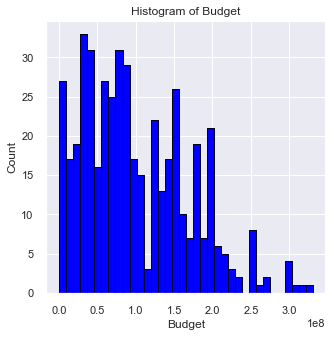

In [109]:
# histogram of budget
plt.hist(movie_new['budget'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(movie_new['budget'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Budget')
plt.xlabel('Budget')
plt.ylabel('Count')

In [110]:
def cramers_v(x, y):
    cfm = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(cfm)[0]
    n = cfm.sum().sum()
    phi2 = chi2/n
    r,k = cfm.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


#extract categorical data
features = movie_new.columns

numeric_features = []
categorical_features = []

for dtype, feature in zip(movie_new.dtypes, movie_new.columns):
    if dtype == object :
        #print(column)
        #print(data_bgtrrl[column].describe())
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)
categorical_features

#categorical_features.remove('IMdb_score')

cateData = movie_new[categorical_features]
associationMatrix2= [[0] * len(cateData.columns) for i in range(len(cateData.columns))]
for i in range (0,len(cateData.columns)):
    for j in range(0,len(cateData.columns)):
        associationMatrix2[i][j] = cramers_v(cateData.iloc[:,i],cateData.iloc[:,j])

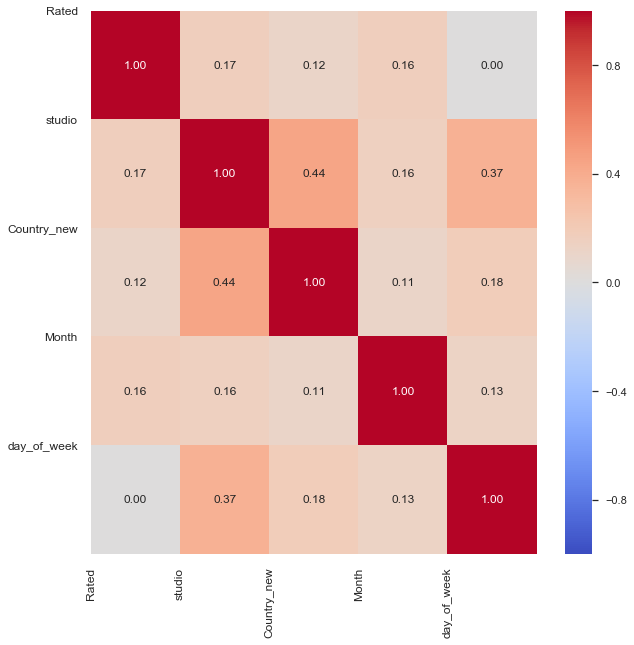

In [111]:
#association plot for categorical variables 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#cax = ax.matshow(associationMatrix2,cmap='coolwarm', vmin=-1, vmax=1)
cax = sns.heatmap(associationMatrix2,cmap='coolwarm', annot=True, fmt=".2f",vmin=-1, vmax=1)

ticks = np.arange(0,len(cateData.columns),1)
ax.set_xticks(ticks)
plt.rc("font", size=12)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation='horizontal',fontsize=12)
ax.set_yticks(ticks)
ax.set_xticklabels(cateData.columns)
ax.set_yticklabels(cateData.columns)
plt.show()


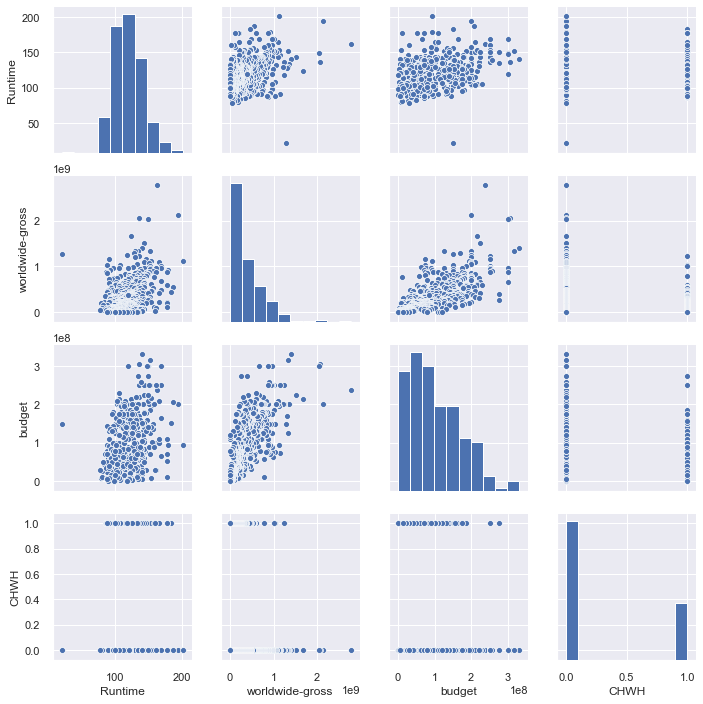

In [112]:
#pair plot 
numData = movie_new[numeric_features]
sns.pairplot(numData)


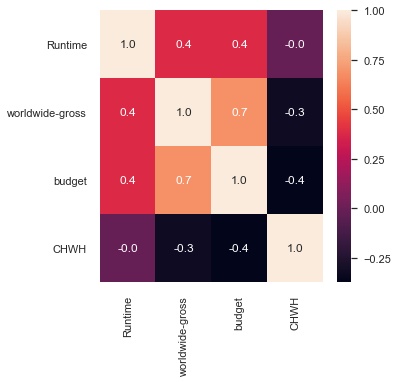

In [113]:
#correlation plot
rs = np.random.RandomState(0)

corr = numData.corr()
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,fmt=".1f")

In [115]:
#label encoder
original_text = movie_new


#label_text = original_text['worldwide-gross']
original_text = original_text.drop(['worldwide-gross'], axis=1)

lb_make = LabelEncoder()
numeric_features = []
categorical_features = []

for dtype, feature in zip(movie_new.dtypes, movie_new.columns):
    if dtype == object:
        #print(column)
        #print(data_bgtrrl[column].describe())
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)
for i in categorical_features:
    movie_new[i] = lb_make.fit_transform(movie_new[i])

original_text_le =movie_new

myDic = {}
for column in categorical_features:
    if column!='worldwide-gross':
        myDic[column]=dict(zip(original_text[column], original_text_le[column]))

#label_dic = dict(zip(label_text,label_text_le))


# functions for impact encoding
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [117]:
original_text_le = original_text_le.drop('worldwide-gross', 1)
xTrain, xTest, yTrain, yTest = train_test_split(original_text_le, movie_new['worldwide-gross'], test_size = 0.2, random_state = 0)

trn_df = pd.concat([xTrain, yTrain], axis=1)
sub_df = pd.concat([xTest, yTest], axis=1)


for i in categorical_features:
    if i!='worldwide-gross':
        trn_df[i], sub_df[i] = target_encode(trn_df[i], 
            sub_df[i], 
            target=trn_df['worldwide-gross'], 
            min_samples_leaf=100,
            smoothing=10,
            noise_level=0.01)
X_train = trn_df.drop(['worldwide-gross'], axis=1)
y_train = trn_df['worldwide-gross']

X_test = sub_df.drop(['worldwide-gross'], axis=1)
y_test = sub_df['worldwide-gross']


original_text_le_us_te = X_train

myDic2 = {}
for column in categorical_features:
    if column!='worldwide-gross':
        myDic2[column]=dict(zip(original_text_le[column], original_text_le_us_te[column]))

No handles with labels found to put in legend.


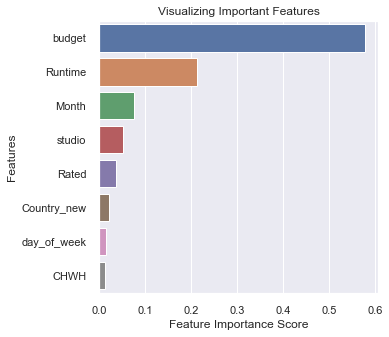

In [119]:
clf=RandomForestRegressor()
clf.fit(xTrain,yTrain)
feature_imp = pd.Series(clf.feature_importances_,index=xTrain.columns).sort_values(ascending=False)
feature_imp

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.rc("font", size=8)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

plt.show()


In [126]:
selectedColumn=[]
for i in range(0,len(feature_imp)):
    if feature_imp.iloc[i]>0.05:
        theColumn = feature_imp.index[i]
        selectedColumn.append(theColumn)
        
X_train = xTrain
X_test = xTest
y_train = yTrain
y_test = yTest

X_train = X_train[selectedColumn]

X_test = X_test[selectedColumn]

model=RandomForestRegressor(random_state=0)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

score = r2_score(y_test, y_pred)
print ("R2 score is:{}".format(score))

R2 score is:0.40929376303566056


## IMDB Score Prediction

In [127]:
# a quick overview of movie data
movie_raw.head()

movie_raw.describe()

movie_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 45 columns):
Actors             466 non-null object
Awards             408 non-null object
BoxOffice          324 non-null float64
Country            466 non-null object
DVD                447 non-null object
Director           466 non-null object
Genre              466 non-null object
IMdb_ID            466 non-null object
IMdb_score         466 non-null int64
Language           466 non-null object
Metascore          466 non-null float64
Plot               466 non-null object
Production         453 non-null object
RT_score           466 non-null float64
Rated              457 non-null object
Released           465 non-null object
Runtime            466 non-null int64
TMdb_id            466 non-null object
Title              466 non-null object
Type               466 non-null object
Website            398 non-null object
Year               466 non-null int64
actor_1            466 non-null objec

In [129]:
#check whole row duplicates 
numOfDuplicatedRows = movie_raw.duplicated(subset=None, keep='first').sum()

#drop duplicated rows 
movie_raw = movie_raw.drop_duplicates(subset=None, keep='first', inplace=False)
movie_raw=movie_raw.reset_index(drop=True)


#split genres
movie_raw.Genre.head()


# rename each variable is tags
movie_raw_split = movie_raw['Genre'].str.split(',',expand = True)


'''
numColumns = movie_raw_split.shape[1]

movie_genres = pd.DataFrame()
for i in range(numColumns):
    new_split = movie_raw_split[i].str.split(':',expand = True)
    try:
         new_split.columns = ['a_'+str(i), 'b_'+str(i),'c_'+str(i)]
         movie_genres = pd.concat([movie_genres, new_split['c_'+str(i)]], axis=1)
    except: 
        continue
'''


'''
for i in movie_genres.columns:
    movie_genres[i] = movie_genres[i].str.replace("'", "")
    movie_genres[i] = movie_genres[i].str.strip()
'''
genre_types = []
for i in range(movie_raw_split.shape[1]):
    types = movie_raw_split.iloc[:,i].unique()
    for the_type in types:
        if the_type not in genre_types:
            genre_types.append(the_type)
genre_types = genre_types[0:27]+genre_types[28:30]

Action 78 0
Action 78 1 0
Action 80 2
Action 158 2 2
Action 85 3
Action 243 3 3
Action 70 4
Action 313 4 4
Action 81 5
Action 394 5 5
Action 74 6
Action 468 6 6
Action 74 7
Action 542 7 7
Action 72 9
Action 614 8 9
Action 62 10
Action 676 9 10
Action 67 14
Action 743 10 14
Action 72 15
Action 815 11 15
Action 78 17
Action 893 12 17
Action 63 18
Action 956 13 18
Action 89 19
Action 1045 14 19
Action 78 20
Action 1123 15 20
Action 57 21
Action 1180 16 21
Action 73 22
Action 1253 17 22
Action 78 23
Action 1331 18 23
Action 90 27
Action 1421 19 27
Action 71 32
Action 1492 20 32
Action 70 33
Action 1562 21 33
Action 62 42
Action 1624 22 42
Action 68 43
Action 1692 23 43
Action 75 44
Action 1767 24 44
Action 65 48
Action 1832 25 48
Action 75 50
Action 1907 26 50
Action 77 51
Action 1984 27 51
Action 79 53
Action 2063 28 53
Action 60 54
Action 2123 29 54
Action 88 57
Action 2211 30 57
Action 75 58
Action 2286 31 58
Action 73 59
Action 2359 32 59
Action 70 60
Action 2429 33 60
Action 79 63
Act

Drama 72 110
Drama 227 3 110
Drama 86 135
Drama 313 4 135
Drama 84 156
Drama 397 5 156
Drama 52 169
Drama 449 6 169
Drama 76 296
Drama 525 7 296
Drama 76 302
Drama 601 8 302
Drama 78 352
Drama 679 9 352
Drama 79 389
Drama 758 10 389
Drama 79 393
Drama 837 11 393
Drama 75 394
Drama 912 12 394
Drama 67 399
Drama 979 13 399
Drama 64 404
Drama 1043 14 404
Drama 57 408
Drama 1100 15 408
Drama 63 425
Drama 1163 16 425
Drama 82 430
Drama 1245 17 430
Drama 79 445
Drama 1324 18 445
Drama 70 448
Drama 1394 19 448
Adventure 81 8
Adventure 81 1 8
Adventure 79 26
Adventure 160 2 26
Adventure 81 28
Adventure 241 3 28
Adventure 76 29
Adventure 317 4 29
Adventure 74 31
Adventure 391 5 31
Adventure 77 34
Adventure 468 6 34
Adventure 78 35
Adventure 546 7 35
Adventure 74 36
Adventure 620 8 36
Adventure 75 37
Adventure 695 9 37
Adventure 76 38
Adventure 771 10 38
Adventure 87 39
Adventure 858 11 39
Adventure 77 41
Adventure 935 12 41
Adventure 74 45
Adventure 1009 13 45
Adventure 88 49
Adventure 1097 14 

 Adventure 70 292
 Adventure 12146 173 292
 Adventure 70 295
 Adventure 12216 174 295
 Adventure 58 297
 Adventure 12274 175 297
 Adventure 57 298
 Adventure 12331 176 298
 Adventure 79 300
 Adventure 12410 177 300
 Adventure 43 307
 Adventure 12453 178 307
 Adventure 69 309
 Adventure 12522 179 309
 Adventure 61 310
 Adventure 12583 180 310
 Adventure 56 313
 Adventure 12639 181 313
 Adventure 63 315
 Adventure 12702 182 315
 Adventure 69 317
 Adventure 12771 183 317
 Adventure 63 323
 Adventure 12834 184 323
 Adventure 60 325
 Adventure 12894 185 325
 Adventure 54 326
 Adventure 12948 186 326
 Adventure 68 328
 Adventure 13016 187 328
 Adventure 59 332
 Adventure 13075 188 332
 Adventure 64 338
 Adventure 13139 189 338
 Adventure 64 340
 Adventure 13203 190 340
 Adventure 72 344
 Adventure 13275 191 344
 Adventure 55 347
 Adventure 13330 192 347
 Adventure 57 348
 Adventure 13387 193 348
 Adventure 52 350
 Adventure 13439 194 350
 Adventure 73 351
 Adventure 13512 195 351
 Adventure 

 Family 73 76
 Family 1699 23 76
 Family 83 78
 Family 1782 24 78
 Family 78 92
 Family 1860 25 92
 Family 80 97
 Family 1940 26 97
 Family 76 98
 Family 2016 27 98
 Family 78 102
 Family 2094 28 102
 Family 74 114
 Family 2168 29 114
 Family 62 116
 Family 2230 30 116
 Family 77 122
 Family 2307 31 122
 Family 71 128
 Family 2378 32 128
 Family 69 132
 Family 2447 33 132
 Family 79 133
 Family 2526 34 133
 Family 78 139
 Family 2604 35 139
 Family 73 151
 Family 2677 36 151
 Family 65 157
 Family 2742 37 157
 Family 63 159
 Family 2805 38 159
 Family 61 178
 Family 2866 39 178
 Family 62 186
 Family 2928 40 186
 Family 64 190
 Family 2992 41 190
 Family 69 192
 Family 3061 42 192
 Family 58 196
 Family 3119 43 196
 Family 87 201
 Family 3206 44 201
 Family 73 208
 Family 3279 45 208
 Family 62 214
 Family 3341 46 214
 Family 71 215
 Family 3412 47 215
 Family 67 230
 Family 3479 48 230
 Family 69 233
 Family 3548 49 233
 Family 84 234
 Family 3632 50 234
 Family 58 244
 Family 3690 51

 Horror 72 110
 Horror 72 1 110
 Horror 70 123
 Horror 142 2 123
 Horror 58 125
 Horror 200 3 125
 Horror 56 206
 Horror 256 4 206
 Horror 67 225
 Horror 323 5 225
 Horror 70 249
 Horror 393 6 249
 Horror 63 266
 Horror 456 7 266
 Horror 62 312
 Horror 518 8 312
 Horror 56 313
 Horror 574 9 313
 Horror 64 314
 Horror 638 10 314
 Horror 63 327
 Horror 701 11 327
 Horror 59 345
 Horror 760 12 345
 Horror 57 348
 Horror 817 13 348
 Horror 59 365
 Horror 876 14 365
 Horror 75 369
 Horror 951 15 369
 Horror 58 380
 Horror 1009 16 380
 Horror 76 381
 Horror 1085 17 381
 Horror 63 405
 Horror 1148 18 405
 Horror 57 406
 Horror 1205 19 406
 Horror 67 460
 Horror 1272 20 460
 Biography 73 118
 Biography 73 1 118
 Biography 80 124
 Biography 153 2 124
 Biography 71 280
 Biography 224 3 280
 Biography 71 318
 Biography 295 4 318
 Biography 75 321
 Biography 370 5 321
 Biography 72 336
 Biography 442 6 336
 Biography 73 402
 Biography 515 7 402
 Comedy 79 12
 Comedy 79 1 12
 Comedy 79 13
 Comedy 1

 Thriller 58 358
 Thriller 9411 138 358
 Thriller 78 360
 Thriller 9489 139 360
 Thriller 67 361
 Thriller 9556 140 361
 Thriller 62 362
 Thriller 9618 141 362
 Thriller 72 364
 Thriller 9690 142 364
 Thriller 73 368
 Thriller 9763 143 368
 Thriller 75 369
 Thriller 9838 144 369
 Thriller 61 370
 Thriller 9899 145 370
 Thriller 76 371
 Thriller 9975 146 371
 Thriller 63 372
 Thriller 10038 147 372
 Thriller 66 373
 Thriller 10104 148 373
 Thriller 76 374
 Thriller 10180 149 374
 Thriller 43 375
 Thriller 10223 150 375
 Thriller 53 377
 Thriller 10276 151 377
 Thriller 57 378
 Thriller 10333 152 378
 Thriller 70 382
 Thriller 10403 153 382
 Thriller 68 386
 Thriller 10471 154 386
 Thriller 71 387
 Thriller 10542 155 387
 Thriller 79 389
 Thriller 10621 156 389
 Thriller 73 391
 Thriller 10694 157 391
 Thriller 74 395
 Thriller 10768 158 395
 Thriller 62 396
 Thriller 10830 159 396
 Thriller 61 398
 Thriller 10891 160 398
 Thriller 67 399
 Thriller 10958 161 399
 Thriller 73 402
 Thrille

Action 230700000 250
Action 104230211887 178 250
Action 229900000 251
Action 104460111887 179 251
Action 229100000 252
Action 104689211887 180 252
Action 227900000 253
Action 104917111887 181 253
Action 226900000 255
Action 105144011887 182 255
Action 226800000 256
Action 105370811887 183 256
Action 224000000 258
Action 105594811887 184 258
Action 222100000 259
Action 105816911887 185 259
Action 221600000 260
Action 106038511887 186 260
Action 220000000 261
Action 106258511887 187 261
Action 219900000 262
Action 106478411887 188 262
Action 218300000 265
Action 106696711887 189 265
Action 217100000 266
Action 106913811887 190 266
Action 217000000 267
Action 107130811887 191 267
Action 215900000 268
Action 107346711887 192 268
Action 215300000 269
Action 107562011887 193 269
Action 214000000 270
Action 107776011887 194 270
Action 213500000 272
Action 107989511887 195 272
Action 211800000 274
Action 108201311887 196 274
Action 211800000 275
Action 108413111887 197 275
Action 208100000 276

Adventure 12736000000 13 45
Adventure 869300000 49
Adventure 13605300000 14 49
Adventure 829700000 55
Adventure 14435000000 15 55
Adventure 829700000 56
Adventure 15264700000 16 56
Adventure 814000000 61
Adventure 16078700000 17 61
Adventure 796700000 62
Adventure 16875400000 18 62
Adventure 745000000 75
Adventure 17620400000 19 75
Adventure 694400000 86
Adventure 18314800000 20 86
Adventure 677500000 89
Adventure 18992300000 21 89
Adventure 630200000 99
Adventure 19622500000 22 99
Adventure 609000000 103
Adventure 20231500000 23 103
Adventure 591700000 107
Adventure 20823200000 24 107
Adventure 572600000 114
Adventure 21395800000 25 114
Adventure 429600000 155
Adventure 21825400000 26 155
Adventure 415700000 159
Adventure 22241100000 27 159
Adventure 372200000 178
Adventure 22613300000 28 178
Adventure 361700000 185
Adventure 22975000000 29 185
Adventure 325300000 201
Adventure 23300300000 30 201
Adventure 321500000 203
Adventure 23621800000 31 203
Adventure 299500000 214
Adventure 23

 Adventure 213500000 272
 Adventure 105845211887 167 272
 Adventure 208100000 276
 Adventure 106053311887 168 276
 Adventure 203600000 279
 Adventure 106256911887 169 279
 Adventure 203400000 280
 Adventure 106460311887 170 280
 Adventure 202000000 282
 Adventure 106662311887 171 282
 Adventure 197400000 287
 Adventure 106859711887 172 287
 Adventure 188100000 292
 Adventure 107047811887 173 292
 Adventure 183000000 295
 Adventure 107230811887 174 295
 Adventure 179300000 297
 Adventure 107410111887 175 297
 Adventure 179200000 298
 Adventure 107589311887 176 298
 Adventure 177400000 300
 Adventure 107766711887 177 300
 Adventure 168000000 307
 Adventure 107934711887 178 307
 Adventure 162400000 309
 Adventure 108097111887 179 309
 Adventure 162100000 310
 Adventure 108259211887 180 310
 Adventure 160500000 313
 Adventure 108419711887 181 313
 Adventure 160100000 315
 Adventure 108579811887 182 315
 Adventure 157100000 317
 Adventure 108736911887 183 317
 Adventure 151800000 323
 Adven

 Action 521200000 128
 Action 7742200000 9 128
 Action 469200000 139
 Action 8211400000 10 139
 Action 69900000 390
 Action 8281300000 11 390
 Action 48400000 411
 Action 8329700000 12 411
 Crime 1236000000 14
 Crime 1236000000 1 14
 Crime 1023800000 25
 Crime 2259800000 2 25
 Crime 1003000000 27
 Crime 3262800000 3 27
 Crime 788700000 64
 Crime 4051500000 4 64
 Crime 545400000 119
 Crime 4596900000 5 119
 Crime 524000000 127
 Crime 5120900000 6 127
 Crime 519300000 130
 Crime 5640200000 7 130
 Crime 478200000 136
 Crime 6118400000 8 136
 Crime 376100000 175
 Crime 6494500000 9 175
 Crime 368900000 181
 Crime 6863400000 10 181
 Crime 350400000 189
 Crime 7213800000 11 189
 Crime 347200000 193
 Crime 7561000000 12 193
 Crime 334900000 198
 Crime 7895900000 13 198
 Crime 312000000 207
 Crime 8207900000 14 207
 Crime 296900000 216
 Crime 8504800000 15 216
 Crime 296700000 217
 Crime 8801500000 16 217
 Crime 273300000 228
 Crime 9074800000 17 228
 Crime 270000000 229
 Crime 9344800000 18 2

 Sci-Fi 70891704184 90 177
 Sci-Fi 370600000 179
 Sci-Fi 71262304184 91 179
 Sci-Fi 370500000 180
 Sci-Fi 71632804184 92 180
 Sci-Fi 368800000 182
 Sci-Fi 72001604184 93 182
 Sci-Fi 361700000 185
 Sci-Fi 72363304184 94 185
 Sci-Fi 353600000 188
 Sci-Fi 72716904184 95 188
 Sci-Fi 348300000 191
 Sci-Fi 73065204184 96 191
 Sci-Fi 347200000 193
 Sci-Fi 73412404184 97 193
 Sci-Fi 343500000 194
 Sci-Fi 73755904184 98 194
 Sci-Fi 335300000 196
 Sci-Fi 74091204184 99 196
 Sci-Fi 312300000 205
 Sci-Fi 74403504184 100 205
 Sci-Fi 312200000 206
 Sci-Fi 74715704184 101 206
 Sci-Fi 303000000 211
 Sci-Fi 75018704184 102 211
 Sci-Fi 302500000 212
 Sci-Fi 75321204184 103 212
 Sci-Fi 299300000 215
 Sci-Fi 75620504184 104 215
 Sci-Fi 296300000 218
 Sci-Fi 75916804184 105 218
 Sci-Fi 290500000 220
 Sci-Fi 76207304184 106 220
 Sci-Fi 288900000 221
 Sci-Fi 76496204184 107 221
 Sci-Fi 288300000 222
 Sci-Fi 76784504184 108 222
 Sci-Fi 286200000 223
 Sci-Fi 77070704184 109 223
 Sci-Fi 286100000 224
 Sci-Fi 77

 Horror 81100000 381
 Horror 3902900000 17 381
 Horror 57100000 405
 Horror 3960000000 18 405
 Horror 56900000 406
 Horror 4016900000 19 406
 Horror 1200000 460
 Horror 4018100000 20 460
 Biography 547400000 118
 Biography 547400000 1 118
 Biography 533000000 124
 Biography 1080400000 2 124
 Biography 203400000 280
 Biography 1283800000 3 280
 Biography 156800000 318
 Biography 1440600000 4 318
 Biography 154800000 321
 Biography 1595400000 5 321
 Biography 134900000 336
 Biography 1730300000 6 336
 Biography 61200000 402
 Biography 1791500000 7 402
 Comedy 1241400000 12
 Comedy 1241400000 1 12
 Comedy 1241400000 13
 Comedy 2482800000 2 13
 Comedy 1159400000 16
 Comedy 3642200000 3 16
 Comedy 1034800000 24
 Comedy 4677000000 4 24
 Comedy 1023800000 25
 Comedy 5700800000 5 25
 Comedy 970800000 30
 Comedy 6671600000 6 30
 Comedy 962100000 33
 Comedy 7633700000 7 33
 Comedy 919800000 40
 Comedy 8553500000 8 40
 Comedy 877200000 46
 Comedy 9430700000 9 46
 Comedy 875500000 47
 Comedy 10306

 Thriller 227900000 253
 Thriller 39612500000 83 253
 Thriller 226900000 255
 Thriller 39839400000 84 255
 Thriller 226800000 256
 Thriller 40066200000 85 256
 Thriller 224000000 258
 Thriller 40290200000 86 258
 Thriller 221600000 260
 Thriller 40511800000 87 260
 Thriller 220000000 261
 Thriller 40731800000 88 261
 Thriller 218800000 264
 Thriller 40950600000 89 264
 Thriller 218300000 265
 Thriller 41168900000 90 265
 Thriller 215900000 268
 Thriller 41384800000 91 268
 Thriller 214000000 270
 Thriller 41598800000 92 270
 Thriller 207300000 277
 Thriller 41806100000 93 277
 Thriller 205400000 278
 Thriller 42011500000 94 278
 Thriller 203400000 280
 Thriller 42214900000 95 280
 Thriller 203300000 281
 Thriller 42418200000 96 281
 Thriller 199900000 284
 Thriller 42618100000 97 284
 Thriller 199000000 285
 Thriller 42817100000 98 285
 Thriller 192300000 288
 Thriller 43009400000 99 288
 Thriller 190400000 289
 Thriller 43199800000 100 289
 Thriller 183000000 295
 Thriller 43382800000

 Sport 562100000 116
 Sport 562100000 1 116
 Sport 359100000 186
 Sport 921200000 2 186
 Sport 299300000 215
 Sport 1220500000 3 215
 Sport 173600000 302
 Sport 1394100000 4 302
 Sport 93900000 367
 Sport 1488000000 5 367
 Sport 83500000 377
 Sport 1571500000 6 377
 Sport 51800000 408
 Sport 1623300000 7 408
 Sport 41500000 420
 Sport 1664800000 8 420
 Sport 23100000 430
 Sport 1687900000 9 430
 Sport 13400000 441
 Sport 1701300000 10 441
 Music 226900000 255
 Music 226900000 1 255
 Music 201600000 283
 Music 428500000 2 283
 Musical 858600000 52
 Musical 858600000 1 52
 Musical 484600000 132
 Musical 1343200000 2 132
 Musical 348800000 190
 Musical 1692000000 3 190


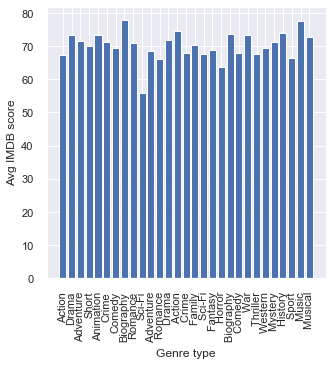

In [130]:
movie_raw['IMdb_score']=movie_raw['IMdb_score'].fillna('Unknown')
score_dict = {}


for genre in genre_types:
    score = 0
    count = 0
    
    for i in range(movie_raw_split.shape[0]):
        if genre in list(movie_raw_split.iloc[i,:]):
            #print(genre,movie_raw['vote_average'][i])
            print(genre,movie_raw['IMdb_score'][i],i)

            if movie_raw['IMdb_score'][i]!='Unknown':
                score = score + movie_raw['IMdb_score'][i]
                count = count+1
                print(genre,score,count,i)
    score_dict[genre] = score/count
   
gross_dict={}
movie_raw['worldwide-gross']=movie_raw['worldwide-gross'].fillna('Unknown')
for genre in genre_types:
    gross = 0
    count = 0
    for i in range(movie_raw_split.shape[0]):
        if genre in list(movie_raw_split.iloc[i,:]):
            #print(genre,movie_raw['vote_average'][i])
            print(genre,movie_raw['worldwide-gross'][i],i)

            if movie_raw['worldwide-gross'][i]!='Unknown':
                gross = gross + movie_raw['worldwide-gross'][i]
                count = count+1
                print(genre,gross,count,i)
    gross_dict[genre] = gross/count

names = list(score_dict.keys())

values = list(score_dict.values())





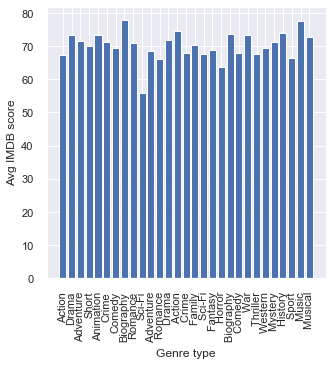

In [131]:
#tick_label does the some work as plt.xticks()

plt.bar(range(len(score_dict)),values,tick_label=names)
plt.xticks(rotation=90)
plt.ylabel("Avg IMDB score")
plt.xlabel("Genre type")
plt.savefig('Genres_score.png')
plt.show()

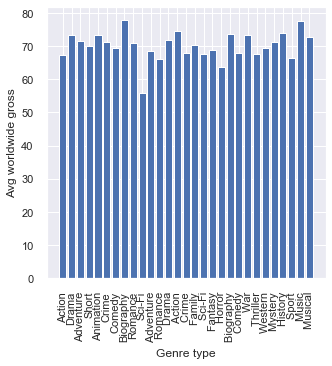

In [132]:
names = list(score_dict.keys())

values = list(score_dict.values())

#tick_label does the some work as plt.xticks()

plt.bar(range(len(score_dict)),values,tick_label=names)
plt.xticks(rotation=90)
plt.ylabel("Avg worldwide gross")
plt.xlabel("Genre type")
plt.savefig('Genres_gross.png')
plt.show()

In [133]:
# genre can be removed from feature list
movie_new = movie_raw.drop('Genre', 1)


#actors 
unique_actors = list(set(movie_new['actor_1']))
unique_actors = unique_actors+list(set(movie_new['actor_2']))
#num of unique actors
unique_actor_per_movie = len(unique_actors)/movie_new.shape[0]

#directors
unique_directors = list(set(movie_new['director_1']))
unique_directors = unique_actors+list(set(movie_new['director_2']))
#num of unique actors
unique_director_per_movie = len(unique_directors)/movie_new.shape[0]


actor_score1 = movie_new[['actor_1','IMdb_score']].groupby(['actor_1']).sum()
actor_score1['freq'] = movie_new[['actor_1','IMdb_score']].groupby(['actor_1']).count()
actor_score1.columns = ['Sum','Freq']
actor_score1['Avg_IMdb_score'] = actor_score1['Sum']/ actor_score1['Freq']
#top_20_actors = actor_score1.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]


actor_score2 = movie_new[['actor_2','IMdb_score']].groupby(['actor_2']).sum()
actor_score2['freq'] = movie_new[['actor_2','IMdb_score']].groupby(['actor_2']).count()
actor_score2.columns = ['Sum','Freq']
actor_score2['Avg_IMdb_score'] = actor_score2['Sum']/ actor_score2['Freq']
#top_20_actors = actor_score2.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]

actor_combined = pd.concat([actor_score1, actor_score2],axis=0)
actor_combined = actor_combined.reset_index(drop=False)
actor_combined.columns = ['Actor','Sum','Freq','Avg_IMdb_score']
actor_sum= actor_combined.groupby('Actor')['Sum'].sum()
actor_freq = actor_combined.groupby('Actor')['Freq'].sum()
actor_score = actor_sum/actor_freq
actor_combined = pd.concat([actor_sum,actor_freq,actor_score],axis=1)
actor_combined = actor_combined.reset_index(drop=False)
actor_combined.columns = ['Actor','Sum','Freq','Avg_IMdb_score']
top_20_actors = actor_combined.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]


#top 20 directors 

director_score1 = movie_new[['director_1','IMdb_score']].groupby(['director_1']).sum()
director_score1['freq'] = movie_new[['director_1','IMdb_score']].groupby(['director_1']).count()
director_score1.columns = ['Sum','Freq']
director_score1['Avg_IMdb_score'] = director_score1['Sum']/ director_score1['Freq']

director_score2 = movie_new[['director_2','IMdb_score']].groupby(['director_2']).sum()
director_score2['freq'] = movie_new[['director_2','IMdb_score']].groupby(['director_2']).count()
director_score2.columns = ['Sum','Freq']
director_score2['Avg_IMdb_score'] = director_score2['Sum']/ director_score2['Freq']
#top_20_actors = actor_score2.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]

director_combined = pd.concat([director_score1, director_score2],axis=0)
director_combined = director_combined.reset_index(drop=False)
director_combined.columns = ['Director','Sum','Freq','Avg_IMdb_score']
director_sum= director_combined.groupby('Director')['Sum'].sum()
director_freq = director_combined.groupby('Director')['Freq'].sum()
director_score = director_sum/director_freq
director_combined = pd.concat([director_sum,director_freq,director_score],axis=1)
director_combined = director_combined.reset_index(drop=False)
director_combined.columns = ['Director','Sum','Freq','Avg_IMdb_score']
top_20_directors = actor_combined.sort_values(by=['Avg_IMdb_score'],ascending=False)[:20]

In [134]:
data_missing = movie_new.isna()
data_num_missing = data_missing.sum()
data_missing_pct = data_num_missing/len(movie_new)*100
data_missing_pct=data_missing_pct.replace(0, np.NaN)
mean_data_missing_pct=data_missing_pct.mean()
mean_data_missing_pct

#drop irrelavent columns for prediction
movie_new = movie_new.drop('BoxOffice', 1)
movie_new = movie_new.drop('IMdb_ID', 1)
movie_new = movie_new.drop('Metascore', 1)
movie_new = movie_new.drop('RT_score', 1)
movie_new = movie_new.drop('TMdb_id', 1)
movie_new = movie_new.drop('Website', 1)

movie_new = movie_new.drop('bo_year', 1)
movie_new = movie_new.drop('bo_year_rank', 1)
movie_new = movie_new.drop('itunes_id', 1)
movie_new = movie_new.drop('worldwide-gross', 1)
#movie_new = movie_new.drop('logBoxOffice', 1)

movie_new = movie_new.drop('domestic-gross', 1)
movie_new = movie_new.drop('domestic-pct', 1)
movie_new = movie_new.drop('overseas-gross', 1)
movie_new = movie_new.drop('overseas-pct', 1)
movie_new = movie_new.drop('oscar_noms', 1)
movie_new = movie_new.drop('oscar_wins', 1)
movie_new = movie_new.drop('awards', 1)
movie_new = movie_new.drop('Awards', 1)
movie_new = movie_new.drop('Production', 1)

#remove non-movie
movie_new =movie_new[movie_new['Type']=='movie']

movie_new['Rated'].value_counts()

#We want to replace “Approved”, “Not Rated”, “Passed”, “Unrated” with the most common rating “R”.
movie_new.loc[movie_new['Rated']=='APPROVED', 'Rated'] = 'R'
movie_new.loc[movie_new['Rated']=='NOT RATED', 'Rated'] = 'R'
movie_new.loc[movie_new['Rated']=='TV-MA', 'Rated'] = 'R'
#According to the history of naming these different content ratings, we find M = GP = PG, X = NC-17
movie_new.loc[movie_new['Rated']=='GP', 'Rated'] = 'PG'

movie_new['Language'].value_counts()
movie_new['English'] = movie_new.loc[movie_new.Language.str.contains('English'), 'Language'] = 'Yes'
movie_new['English'] =movie_new['English'] .fillna('No')
movie_new['English'].value_counts()  #all movies contain English
#remove language
movie_new = movie_new.drop('English', 1)
movie_new = movie_new.drop('Language', 1)


movie_new['Country'].value_counts()
movie_new['Country']=movie_new['Country'].fillna('Unknown')
country_split = movie_new['Country'].str.split(',',expand = True)

for i in country_split.columns:
    country_split[i] = country_split[i].str.strip()
    
    
country = []
for i in range(country_split.shape[1]):
    types = country_split.iloc[:,i].unique()
    for the_type in types:
        if the_type not in country:
            country.append(the_type)

country = country[0:19] +country[20:57]
country_dict = {}


for theCountry in country:
    
    count = 0
    
    for i in range(country_split.shape[0]):
        if theCountry in list(country_split.iloc[i,:]):                
                count = count+1
               
    country_dict[theCountry] = count
    
sorted(country_dict.items(), key = lambda x : x[1])
#USA, UK and China have the most number of movies
loc = ""
movie_new['Country_new'] = ""
for i in range(country_split.shape[0]):
    loc = ""
    if "USA" in list(country_split.iloc[i,:]):
        loc = "USA"
    if "UK" in list(country_split.iloc[i,:]):
        loc = loc + "UK"
    if "China" in list(country_split.iloc[i,:]):
        loc = loc + "China"
    if loc =="": 
        loc = "Others"
    movie_new.loc[i, 'Country_new'] = loc
        
data_missing = movie_new.isna()
data_num_missing = data_missing.sum()
data_missing_pct = data_num_missing/len(movie_new)*100
data_missing_pct=data_missing_pct.replace(0, np.NaN)
mean_data_missing_pct=data_missing_pct.mean()
mean_data_missing_pct


movie_new = movie_new.drop('Country', 1)
movie_new = movie_new.drop('nominations', 1)
#Impute missing value (numerical)
mean_value=movie_new['Runtime'].mean()
movie_new['Runtime']=movie_new['Runtime'].fillna(mean_value)



movie_new = movie_new.drop('Actors', 1)
movie_new = movie_new.drop('Director', 1)
movie_new = movie_new.drop('Title', 1)


#279


#directors and actors are too diversed to be included in the features
movie_new = movie_new.drop('actor_1', 1)
movie_new = movie_new.drop('actor_2', 1)
movie_new = movie_new.drop('director_1', 1)
movie_new = movie_new.drop('director_2', 1)




movie_new = movie_new.drop('Year', 1)
movie_new = movie_new.drop('Type', 1)

movie_new = movie_new.drop('years', 1)
movie_new = movie_new.drop('mojo_title', 1)
movie_new = movie_new.drop('Plot', 1)
movie_new = movie_new.drop('DVD', 1)
movie_new = movie_new.drop('imdbVotes', 1)
#day of week based on released day
movie_new['Month']= movie_new['Released'].astype(str).str.split('-',expand = True)[1]

movie_new['Released'] = pd.to_datetime(movie_new['Released'])

movie_new['day_of_week'] = movie_new['Released'].dt.day_name()


#impute missing value


movie_new['Rated'].fillna(movie_new['Rated'].mode()[0], inplace=True)
movie_new['Month'].fillna(movie_new['Month'].mode()[0], inplace=True)
movie_new['studio'].fillna(movie_new['studio'].mode()[0], inplace=True)
movie_new['day_of_week'].fillna(movie_new['day_of_week'].mode()[0], inplace=True)
movie_new = movie_new.drop('Released', 1)

movie_new['budget']=movie_new['budget'].fillna(0)

mean_budget = movie_new.loc[movie_new['budget']!=0, 'budget'].median() 
movie_new.loc[movie_new['budget']==0, 'budget'] = mean_budget

#movie_new['log_budget'] = np.log(movie_new['budget'])
#movie_new = movie_new.drop('budget', 1)

movie_new = movie_new.drop('ROI', 1)

Text(0, 0.5, 'Count')

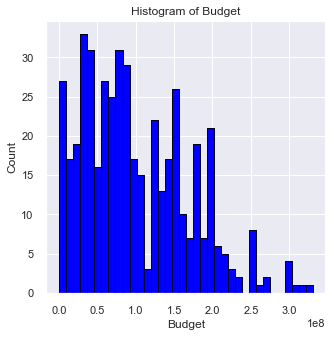

In [135]:
# histogram of budget
plt.hist(movie_new['budget'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(movie_new['budget'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Budget')
plt.xlabel('Budget')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

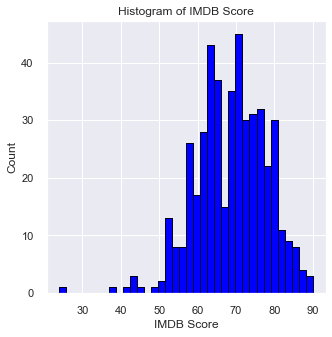

In [136]:
#Bin reposnse variable
plt.hist(movie_new['IMdb_score'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(movie_new['IMdb_score'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of IMDB Score')
plt.xlabel('IMDB Score')
plt.ylabel('Count')

In [137]:
movie_new['IMdb_score'].describe()
#[23,69],[69,90]

mean_value=movie_new['IMdb_score'].mean()
movie_new['IMdb_score']=movie_new['IMdb_score'].fillna(mean_value)

label = pd.qcut(movie_new['IMdb_score'], q=3,precision=0)

movie_new['IMdb_score'] = label.values.astype(str)

In [138]:
#extract categorical data
features = movie_new.columns

numeric_features = []
categorical_features = []

for dtype, feature in zip(movie_new.dtypes, movie_new.columns):
    if dtype == object :
        #print(column)
        #print(data_bgtrrl[column].describe())
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)
categorical_features

categorical_features.remove('IMdb_score')
cateData = movie_new[categorical_features]
associationMatrix2= [[0] * len(cateData.columns) for i in range(len(cateData.columns))]
for i in range (0,len(cateData.columns)):
    for j in range(0,len(cateData.columns)):
        associationMatrix2[i][j] = cramers_v(cateData.iloc[:,i],cateData.iloc[:,j])

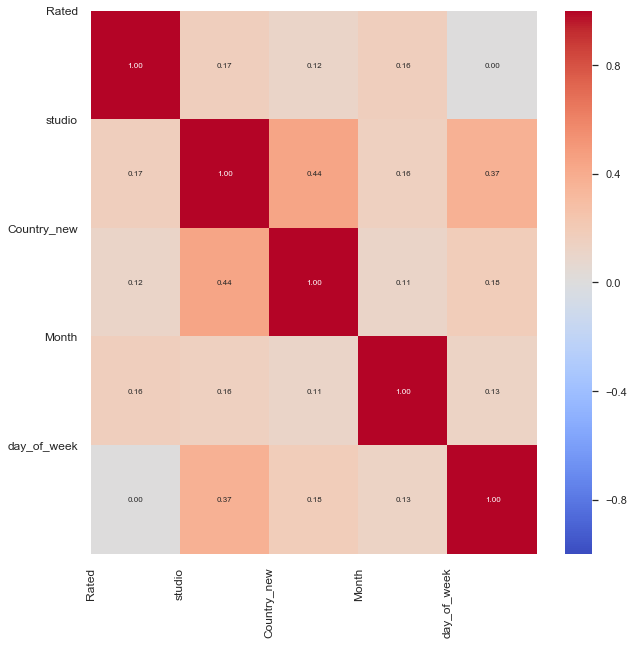

In [139]:
#association plot for categorical variables 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#cax = ax.matshow(associationMatrix2,cmap='coolwarm', vmin=-1, vmax=1)
cax = sns.heatmap(associationMatrix2,cmap='coolwarm', annot=True, fmt=".2f",vmin=-1, vmax=1)

ticks = np.arange(0,len(cateData.columns),1)
ax.set_xticks(ticks)
plt.rc("font", size=12)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation='horizontal',fontsize=12)
ax.set_yticks(ticks)
ax.set_xticklabels(cateData.columns)
ax.set_yticklabels(cateData.columns)
plt.show()


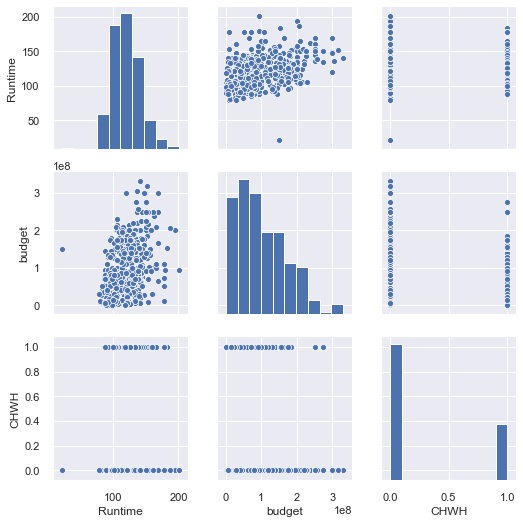

In [140]:
#pair plot 
numData = movie_new[numeric_features]
sns.pairplot(numData)

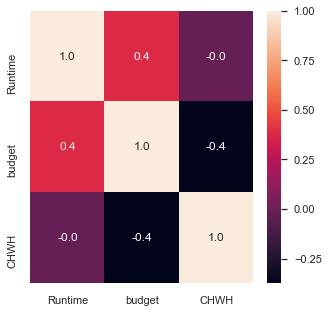

In [141]:
#correlation plot
rs = np.random.RandomState(0)

corr = numData.corr()
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,fmt=".1f")

In [142]:
original_text = movie_new


label_text = label
original_text = original_text.drop(['IMdb_score'], axis=1)

In [143]:
lb_make = LabelEncoder()
numeric_features = []
categorical_features = []

for dtype, feature in zip(movie_new.dtypes, movie_new.columns):
    if dtype == object:
        #print(column)
        #print(data_bgtrrl[column].describe())
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)
for i in categorical_features:
    movie_new[i] = lb_make.fit_transform(movie_new[i])

original_text_le =movie_new
movie_new['IMdb_score'] = lb_make.fit_transform(movie_new['IMdb_score'])
label_text_le= movie_new['IMdb_score'] 
#original_text_le = original_text_le.drop(['IMdb_score'], axis=1)


myDic = {}
for column in categorical_features:
    if column!='IMdb_score':
        myDic[column]=dict(zip(original_text[column], original_text_le[column]))

label_dic = dict(zip(label_text,label_text_le))

In [144]:
original_text_le = original_text_le.drop('IMdb_score', 1)
xTrain, xTest, yTrain, yTest = train_test_split(original_text_le, label_text_le, test_size = 0.2, random_state = 0)
trn_df = pd.concat([xTrain, yTrain], axis=1)
sub_df = pd.concat([xTest, yTest], axis=1)


for i in categorical_features:
    if i!='IMdb_score':
        trn_df[i], sub_df[i] = target_encode(trn_df[i], 
            sub_df[i], 
            target=trn_df['IMdb_score'], 
            min_samples_leaf=100,
            smoothing=10,
            noise_level=0.01)
X_train = trn_df.drop(['IMdb_score'], axis=1)
y_train = trn_df['IMdb_score']

X_test = sub_df.drop(['IMdb_score'], axis=1)
y_test = sub_df['IMdb_score']

original_text_le_us_te = X_train

myDic2 = {}
for column in categorical_features:
    if column!='IMdb_score':
        myDic2[column]=dict(zip(original_text_le[column], original_text_le_us_te[column]))

In [149]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp



Runtime        0.197858
Rated          0.147293
studio         0.136008
budget         0.129054
day_of_week    0.125677
Country_new    0.123663
Month          0.117687
CHWH           0.022760
dtype: float64

No handles with labels found to put in legend.


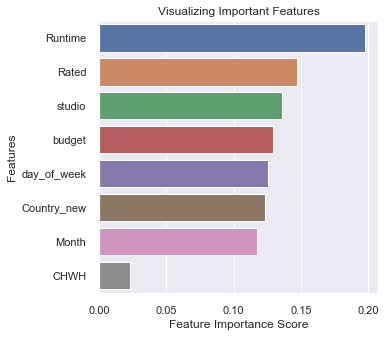

In [150]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.rc("font", size=8)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

plt.show()

In [151]:
selectedColumn=[]
for i in range(0,len(feature_imp)):
    if feature_imp.iloc[i]>0.05:
        theColumn = feature_imp.index[i]
        selectedColumn.append(theColumn)
        

X_train = X_train[selectedColumn]

X_test = X_test[selectedColumn]

model=RandomForestClassifier(random_state=0)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [155]:
accuracyRandom = metrics.accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))

[[21  8  9]
 [ 9  8 14]
 [ 8  9  8]]


In [160]:
def maxminposition(A, n):
   
   maxposition = A.index(max(A)) 
   return maxposition
   
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
validate_results = []
for estimator in n_estimators:
   model = RandomForestClassifier(n_estimators=estimator,random_state=0)
   model.fit(X_train2, y_train2)
   train_pred = model.predict(X_train2)
   result = metrics.accuracy_score(train_pred, y_train2)
   train_results.append(result)
   validate_pred = model.predict(X_valid)
   result = metrics.accuracy_score(validate_pred, y_valid)
   validate_results.append(result) 
   
n_estimators_f = n_estimators[maxminposition(validate_results,len(n_estimators))]

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
validate_results = []
for max_depth in max_depths:
   model = RandomForestClassifier(max_depth=max_depth, n_jobs=-1,random_state=0)
   model.fit(X_train2, y_train2)
   train_pred = model.predict(X_train2)
   result = metrics.accuracy_score(train_pred, y_train2)
   train_results.append(result)
   validate_pred = model.predict(X_valid)
   result = metrics.accuracy_score(validate_pred, y_valid)
   validate_results.append(result) 

max_depths_f = max_depths[maxminposition(validate_results,len(max_depths))]

#clf=RandomForestClassifier(n_estimators=n_estimators_f,max_depth=max_depths_f,random_state=0)
clf=RandomForestClassifier(n_estimators=n_estimators_f,max_depth=max_depths_f,random_state=0)

clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2.0, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [161]:
# prediction on test set
y_pred=clf.predict(X_test)
print("Accuracy after parameter tuning",metrics.accuracy_score(y_test, y_pred))  #43%

print("confusion matrix", confusion_matrix(y_test,y_pred))

Accuracy after parameter tuning 0.4148936170212766
confusion matrix [[25  1 12]
 [17  0 14]
 [ 9  2 14]]


In [163]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, 2)
        #print("Normalized confusion matrix")
    else:
        1  # print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
def compute_confusion_matrix(true, pred):
    '''Computes a confusion matrix using numpy for two np.arrays
    true and pred.

    Results are identical (and similar in computation time) to: 
      "from sklearn.metrics import confusion_matrix"

    However, this function avoids the dependency on sklearn.'''

    K = len(np.unique(true))  # Number of classes
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result


In [164]:
plt.figure(figsize=(8,8))
plt.rc("font", size=15)
y_predTrain = clf.predict(X_train)

cfm = compute_confusion_matrix(y_train.values.ravel(), y_predTrain)
print(cfm)


[[118.   0.  16.]
 [ 65.  13.  35.]
 [ 49.   2.  74.]]


<Figure size 576x576 with 0 Axes>

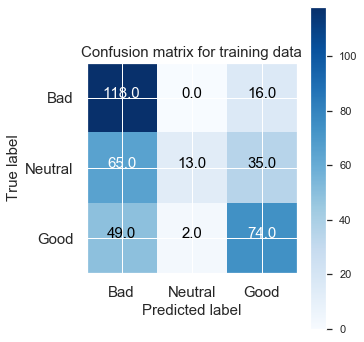

In [165]:
class_names = ['Bad', 'Neutral','Good']
plt.figure()
plot_confusion_matrix(cfm, classes=class_names,
                      title='Confusion matrix for training data')
plt.show()

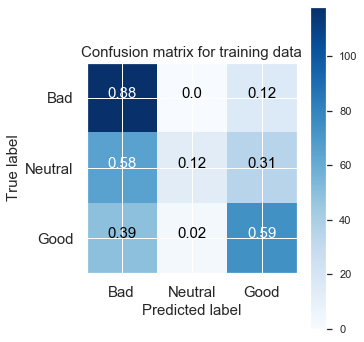

In [166]:
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=True,
                      title='Confusion matrix for training data')
plt.show()


[[25.  1. 12.]
 [17.  0. 14.]
 [ 9.  2. 14.]]


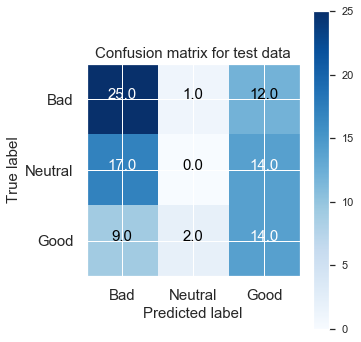

In [167]:
cfm = compute_confusion_matrix(y_test.values.ravel(), y_pred)
print(cfm)
plt.figure()
plot_confusion_matrix(cfm, classes=class_names,
                      title='Confusion matrix for test data')
plt.show()


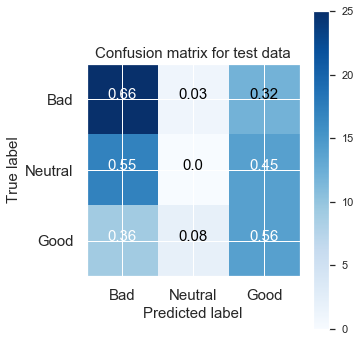

In [168]:
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=True,
                      title='Confusion matrix for test data')
plt.show()


# Twitter Data

## Data Preprocessing (All except Textual data)

In [9]:


#Data import
df = pd.read_csv('movies_list_v2.csv')
df.shape
df.columns
#Data Cleaning
print(df.isna().sum())

df.iloc[:,0]



id                   0
text                 0
lang                 0
country          99953
user_location    33077
Device_info      14662
dtype: int64


0         1193740477905850370
1         1193740478019260421
2         1193740478136692737
3         1193740478623207424
4         1193740479218642947
                 ...         
101717    1193797437493776385
101718    1193797437607034880
101719    1193797438060060672
101720    1193797438710145024
101721    1193797439611912192
Name: id, Length: 101722, dtype: int64

In [10]:
#Detect Non-numbers
cnt=0
for row in df['id']:
    try:
        int(row)
    except ValueError:
        #test.loc[cnt, '# of followers']=np.nan
        print(cnt)
    cnt+=1


In [11]:
#Find the device info

device_list = ['Android', 'iPhone', 'iPad', 'Mac', 'iΟS', 'iOS  ',
       'Android #5', 'Android #8', 'iOS',
       'Android #7','Windows Phone']               

df['Device_info'] = df['Device_info'].apply(lambda x: x if x in device_list else np.nan)
df['Device_info'] = df['Device_info'].replace(['Android #7','Android #5','Android #8'],'Android')
df['Device_info'] = df['Device_info'].replace(['iPhone','iPad','Mac','iOS  ','iOS'],'iΟS')
  
#list of unique values
df['Device_info'].unique()
print(df['Device_info'].isna().sum())



14662


In [12]:
#language
df['lang'].unique()
tweets_by_lang = df['lang'].value_counts()
print(df.isna().sum())



id                   0
text                 0
lang                 0
country          99953
user_location    33077
Device_info      14662
dtype: int64


In [13]:
#Country data clearning
df['country'].unique()

array([nan, 'United States', 'South Africa', 'Kenya', 'Chile', 'Mexico',
       'Nigeria', 'India', 'México', 'United Kingdom', 'Singapore',
       'Belgium', 'Indonesia', 'Canada', 'Antigua and Barbuda',
       'Malaysia', 'Sweden', 'Republic of the Philippines', 'Brazil',
       'Argentina', 'Hashemite Kingdom of Jordan', 'Brasil', 'Malawi',
       'France', 'Costa Rica', 'Botswana', 'United Arab Emirates', 'Peru',
       'Portugal', 'Kingdom of Saudi Arabia', 'Zimbabwe', 'Colombia',
       'Italy', 'Bangladesh', 'Jamaica', 'Saint Lucia', 'Australia',
       'Germany', 'Hong Kong', 'Cyprus', 'Nederland', '日本',
       'Estados Unidos', 'Bahamas', 'Trinidad and Tobago', 'Deutschland',
       'New Zealand', 'Zambia', 'Ísland', 'Algeria', 'Reino Unido',
       'Belize', "People's Republic of China", 'Ghana', 'Tanzania',
       'Paraguay', 'Republic of Korea', 'Kuwait', 'Russia', 'Bahrain',
       'El Salvador', 'Egypt', 'Panamá', 'Uganda', 'España', 'Pakistan',
       'Italia', 'Fiji', '

In [14]:
#Create new csv file
columns_to_use = ['id', 'text','lang','country', 'user_location', 'Device_info']
df_2 = pd.DataFrame()
for i in columns_to_use:
    df_2[columns_to_use] = df[columns_to_use] 
    
#export_csv = df_2.to_csv (r'movie_list_v3.csv', index = None, header=True) 

## Data Preprocessing (Textual)

In [15]:
tweets = pd.read_csv('movies_list_v2.csv')

In [16]:
def extract_text():
    tweets_list = tweets['text']
    lst = []
    for t in tweets_list:
        lst.append(t)
    return lst
# extract_text()
def check_common_elements(text, word_arr):
    for word in word_arr:
        word = word.lower()
        text = text.lower()
        match = re.search(word, text)
        if match:
            return word
    return False
def _all_cast(da):
    lst = []
    for d in da:
        lst += d.split(' ')
    return lst
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return word
    else:
        return False
def check_common_elements(tweet, m_d):
    tweet = tweet.lower()
    lst = []
    for i in m_d:
        i = i.lower()
        match = re.search(i, tweet)
        if match:
            lst.append(i)
    return lst if len(lst) > 1 else False

In [17]:
movie_data =['Joker','Shoplifters','Toy Story 4','Toy Story','Avengers: Endgame', 'Avengers Endgame','Doctor Sleep','Zombieland: Double Tap','Zombieland', 'Double Tap','Official Secret','Once Upon a Time in Hollywood','Spider-Man: Far From Home','Spiderman', 'far from home','Rocketman','Avengers','Doctor','Endgame','Double Tap','Spider-Man','Far From Home']
cast_data = ['Joaquin Phoenix','Zazie Beetz','Robert De Niro','Bryan Callen','Shea Whigham','Lily Franky','Sakura Ando','Mayu Matsuoka','Kirin Kiki','Jyo Kairi','Tom Hanks','Patricia Arquette','Tim Allen','Joan Cusack','Bonnie Hunt','Robert Downey Jr.','Chris Evans','Mark Ruffalo','Chris Hemsworth','Scarlett Johansson','Rebecca Ferguson','Ewan McGregor','Jacob Tremblay','Cliff Curtis','Carel Struycken','emma stone','Abigail Breslin','Woody Harrelson','Jesse Eisenberg','Zoey Deutch','Matthew Goode','Indira Varma','Keira Knightley','Katherine Kelly','Ralph Fiennes','Leonardo DiCaprio','Luke Perry','Margot Robbie','Brad Pitt','Margaret Qualley','Samuel L. Jackson','Zendaya','Tom Holland','Jake Gyllenhaal','Michael Keaton','Bryce Dallas Howard','Richard Madden','Taron Egerton','Jamie Bell','Steven Mackintosh']
cast_data = _all_cast(cast_data)
print(len(cast_data), cast_data)

103 ['Joaquin', 'Phoenix', 'Zazie', 'Beetz', 'Robert', 'De', 'Niro', 'Bryan', 'Callen', 'Shea', 'Whigham', 'Lily', 'Franky', 'Sakura', 'Ando', 'Mayu', 'Matsuoka', 'Kirin', 'Kiki', 'Jyo', 'Kairi', 'Tom', 'Hanks', 'Patricia', 'Arquette', 'Tim', 'Allen', 'Joan', 'Cusack', 'Bonnie', 'Hunt', 'Robert', 'Downey', 'Jr.', 'Chris', 'Evans', 'Mark', 'Ruffalo', 'Chris', 'Hemsworth', 'Scarlett', 'Johansson', 'Rebecca', 'Ferguson', 'Ewan', 'McGregor', 'Jacob', 'Tremblay', 'Cliff', 'Curtis', 'Carel', 'Struycken', 'emma', 'stone', 'Abigail', 'Breslin', 'Woody', 'Harrelson', 'Jesse', 'Eisenberg', 'Zoey', 'Deutch', 'Matthew', 'Goode', 'Indira', 'Varma', 'Keira', 'Knightley', 'Katherine', 'Kelly', 'Ralph', 'Fiennes', 'Leonardo', 'DiCaprio', 'Luke', 'Perry', 'Margot', 'Robbie', 'Brad', 'Pitt', 'Margaret', 'Qualley', 'Samuel', 'L.', 'Jackson', 'Zendaya', 'Tom', 'Holland', 'Jake', 'Gyllenhaal', 'Michael', 'Keaton', 'Bryce', 'Dallas', 'Howard', 'Richard', 'Madden', 'Taron', 'Egerton', 'Jamie', 'Bell', 'Steve

In [19]:
m_d = movie_data
for i in m_d:
    tweets[i] = tweets['text'].apply(lambda tweet: word_in_text(i, tweet))
# tweets.columns
# #Calculate number of tweets
# lst={}
# for i in m_d:
#     try:
#         lst[i] = tweets[i].value_counts()[True]
#     except:
#         lst[i] = 0
# print(lst)
# print(pd.DataFrame(lst))

In [20]:
tweet_content = extract_text()
lst = []
for t in tweet_content:
    check_res = check_common_elements(t, m_d)
    lst.append(check_res)
tweets['check'] = lst
print(pd.DataFrame(tweets))

                         id  \
0       1193740477905850370   
1       1193740478019260421   
2       1193740478136692737   
3       1193740478623207424   
4       1193740479218642947   
...                     ...   
101717  1193797437493776385   
101718  1193797437607034880   
101719  1193797438060060672   
101720  1193797438710145024   
101721  1193797439611912192   

                                                     text lang country  \
0       RT @Brkbru: Let's sleep, Buddy, this Caiman is...   es     NaN   
1       RT @forucinema: ¡Si te quedaste con ganas de v...   es     NaN   
2       @Daniel_Tex18 Goodnight Daniel. Sleep well and...   en     NaN   
3                  Ab barely went to sleep last night yo😭   en     NaN   
4                        @minkyudebut_ 자;;;go to sleep!!!   ko     NaN   
...                                                   ...  ...     ...   
101717  Got to meet Jess Hilarious. My night has been ...   en     NaN   
101718  RT @DrOlufunmilayo: UK plan

In [21]:
tweets = tweets[tweets.check != False]
print(len(tweets))
print(pd.DataFrame(tweets))

4110
                         id  \
51      1193740503067611137   
141     1193740551402770432   
179     1193740566925893643   
186     1193740569530421248   
197     1193740575884763136   
...                     ...   
101618  1193797381512409089   
101647  1193797395290574849   
101653  1193797398600077312   
101663  1193797406132826112   
101704  1193797432242515968   

                                                     text lang        country  \
51      RT @GallinaAstuta: ¿Esa parte en Avengers cuan...   es            NaN   
141     RT @Rowdy_Aleister8: The Mask of the Phantasm\...   en            NaN   
179              Fuck... "Doctor Sleep" was so damn good!   en  United States   
186     RT @ynSection: The Amazing Spider-Man 2 suit. ...   en            NaN   
197     Laporan box office INT untuk Indonesia minggu ...   in            NaN   
...                                                   ...  ...            ...   
101618  RT @Cmdr_Hadfield: I just watched Toy Story 4..

In [23]:
#tweets.to_csv(r'movies_list_v3_when_only_movies_show_up.csv', index=None, header=True)

## Natural Language Processing

In [26]:
df = pd.read_csv('movies_list_v3_when_only_movies_show_up.csv')
df.shape
df.columns


#Remove Stop words
nltk.download('stopwords')
stop = stopwords.words('english')
df['stopwords'] = df['text'].apply(lambda x: len([w for w in x.split() if w in stop]))
df[['text','stopwords']].head()

#Number of special characters
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text','hastags']].head()

#Move all to lower case
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

#Remove Punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('rt\s\w+','')

# Create a Corpus using Tokenization and Stemming
corpus = []
max_value = len(df['text'])
for i in range (0,max_value):
    review = re.sub('[^a-zA-Z]',' ' , df['text'][i])    #Only include letters
    review = review.lower()         #Make all the letters small caps
    review = review.split()         #Split the words into seperate list
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = '  '.join(review)
    corpus.append(review)

corpus_df = pd.DataFrame(corpus, columns =['corpus'])
corpus_df.head()
# Lemmatization
nltk.download('wordnet')
df['corpus'] = corpus_df ['corpus'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['corpus'].iloc[0:15]
#Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc [:, 1].values



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
#Term Frequency
tf1 = (df['corpus']).apply(lambda x: pd.value_counts(x.split(" "))).sum().reset_index()
tf1.columns = ['words','tf']
tf1

words      tf
0               de  2257.0
1               te    92.0
2              que   847.0
3           dejamo     2.0
4        eliminada     3.0
...            ...     ...
27570      jehovah     1.0
27571   esthermayt     1.0
27572       avidli     1.0
27573  jokersomeon     1.0
27574        pwzhm     1.0

[27575 rows x 2 columns]

In [28]:
#Sentiment Analysis
df['sentiment'] = df['corpus'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['corpus','sentiment']].head()

#export_csv = df.to_csv (r'movie_list_v4.csv', index = None, header=True) 

corpus  sentiment
0  si te quedast con gana de ver materi del joker...        0.0
1  doctor tell watch space two week anoth announc...        0.0
2  acabo de ver doctor sue arrepiento haber ido h...        0.0
3  throwback peter fuck drop kick uncl ben spider...       -0.4
4  doctor congrat babi go name newt gingrich mom ...        0.0

## Movie Data Descriptive Analysis

In [30]:
df_movie = pd.read_csv('movie_list_v4.csv')

df_movie['movie_list'] = df_movie['movie_list'].replace(['avengers','endgame','avengers endgame'],'avengers: endgame')
df_movie['movie_list'] = df_movie['movie_list'].replace(['doctor','sleep'],'doctor sleep')
df_movie['movie_list'] = df_movie['movie_list'].replace(['spider-man','far from home','spiderman'],'spider-man: far from home')
df_movie['movie_list'] = df_movie['movie_list'].replace(['zombieland'],'zombieland: double tap')
df_movie['movie_list'] = df_movie['movie_list'].replace(['toy story'],'toy story 4')


In [33]:
pandas_profiling.ProfileReport(df_movie)

C:\Users\User\Anaconda3\lib\site-packages\astropy\stats\bayesian_blocks.py:434: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))


### Tweets by Language

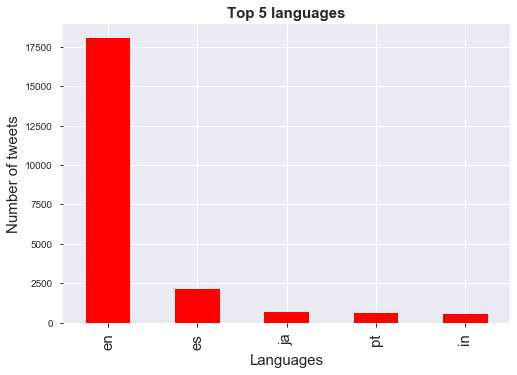

In [34]:
tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')



### Tweet by Country

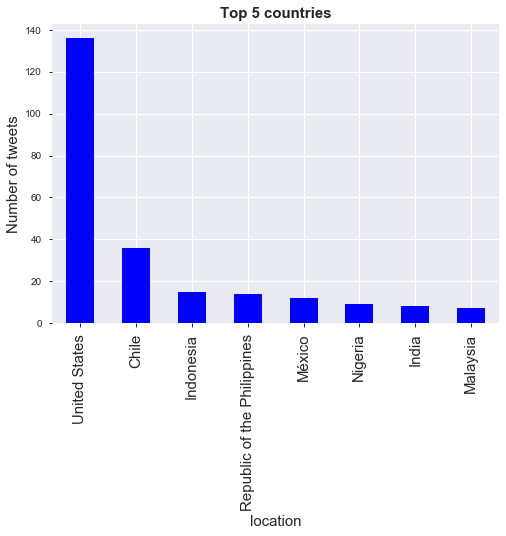

In [35]:
tweets_by_country = df['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:8].plot(ax=ax, kind='bar', color='blue')

### Tweet by Device

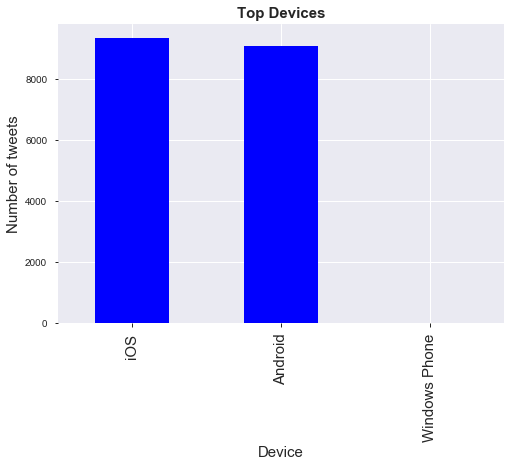

In [36]:
tweets_by_device = df['Device_info'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Device', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Devices', fontsize=15, fontweight='bold')
tweets_by_device.plot(ax=ax, kind='bar', color='blue')

### Tweets by Movie Name

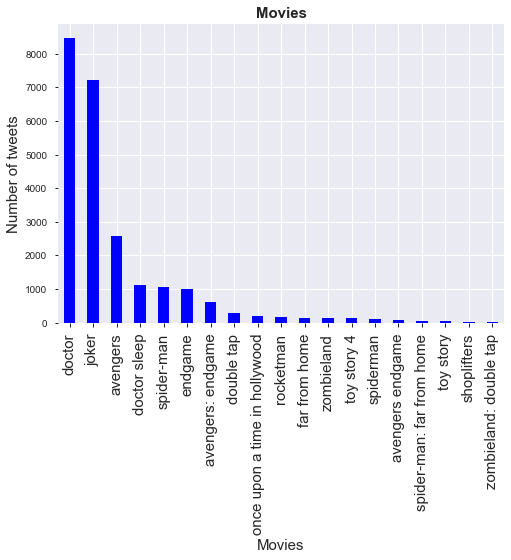

In [37]:
tweets_by_country = df['movie_list'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Movies', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Movies', fontsize=15, fontweight='bold')
tweets_by_country.plot(ax=ax, kind='bar', color='blue')

### Tweets by Actor Name

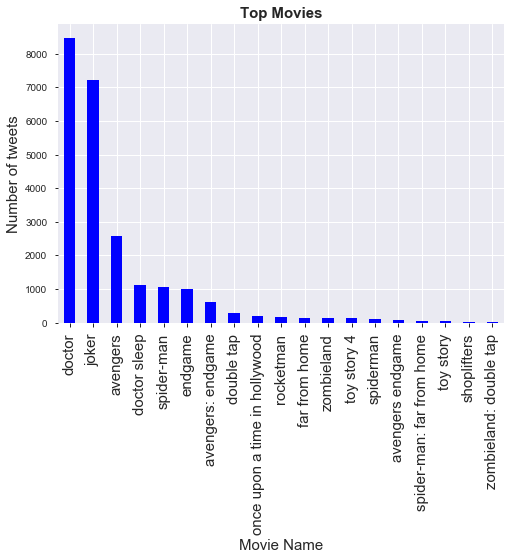

In [38]:
tweets_by_movie = df['movie_list'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Movie Name', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Movies', fontsize=15, fontweight='bold')
tweets_by_movie.plot(ax=ax, kind='bar', color='blue')

### Sentiment Score by Movie

In [39]:
def _get_sentiment_score():
    df = df_movie[['movie_list', 'sentiment']]
    m = {}
    for index, row in df.iterrows():
        movie, senti = row['movie_list'], row['sentiment']
        if movie not in m:
            m[movie] = {'total': senti, 'cnt': 1}
        else:
            d = m[movie]
            m[movie] = {
                'total': d['total'] + senti,
                'cnt': d['cnt'] + 1
            }
    for mo in m:
        d = m[mo]
        v = d['total']/d['cnt']
        m[mo] = '%.4f' % v
#         print(m[mo])
    return m
_get_sentiment_score()

{'joker': '0.0491',
 'doctor sleep': '0.0552',
 'spider-man: far from home': '0.0391',
 'avengers: endgame': '-0.0210',
 'rocketman': '0.0444',
 'once upon a time in hollywood': '0.0153',
 'toy story 4': '0.0797',
 'zombieland: double tap': '0.1071',
 'double tap': '0.0358',
 'shoplifters': '-0.0138'}

### Sentiment Score by Movie

In [60]:
df_score = pd.DataFrame()
m = _get_sentiment_score()
p = pd.DataFrame(list(m.values()), columns=['num'], index=list(m.keys()))
# p = p.sort_values(by=['num'], ascending=False)
p = p.sort_values('num')
# p = pd.DataFrame(list(m.items()))
p['num'] = p['num'].apply(lambda x: float(x) )
print(p)

                                  num
shoplifters                   -0.0138
avengers: endgame             -0.0210
once upon a time in hollywood  0.0153
double tap                     0.0358
spider-man: far from home      0.0391
rocketman                      0.0444
joker                          0.0491
doctor sleep                   0.0552
toy story 4                    0.0797
zombieland: double tap         0.1071


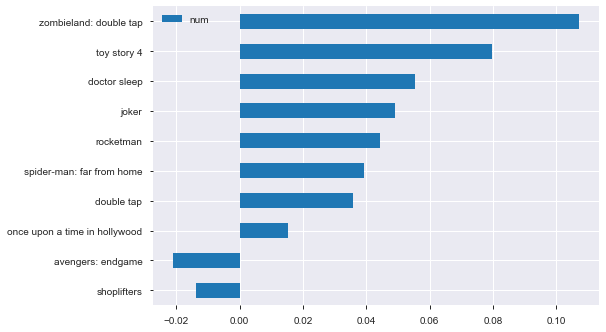

In [61]:
p.plot.barh()

### Popularity
<br>Popularity - Number of tweets that contains the movie name
<br>Feedback - Sentiment Score for each movie
<br>Cast - Sentiment Score for each Cast

In [62]:
df_movie['movie_list'].value_counts()
df_movie_list = pd.DataFrame()
df_movie_list['popularity_score']= df_movie['movie_list'].value_counts().apply(lambda x: float('%.4f' % (x/len(df_movie))))
#df_movie_list['popularity_score']= df_movie['movie_list'].value_counts().apply(lambda x:  (x/len(df_movie)))
a = df_movie_list['popularity_score'].sort_values()
a

shoplifters                      0.0009
zombieland: double tap           0.0061
rocketman                        0.0066
toy story 4                      0.0074
once upon a time in hollywood    0.0085
double tap                       0.0120
spider-man: far from home        0.0574
avengers: endgame                0.1821
joker                            0.3083
doctor sleep                     0.4107
Name: popularity_score, dtype: float64

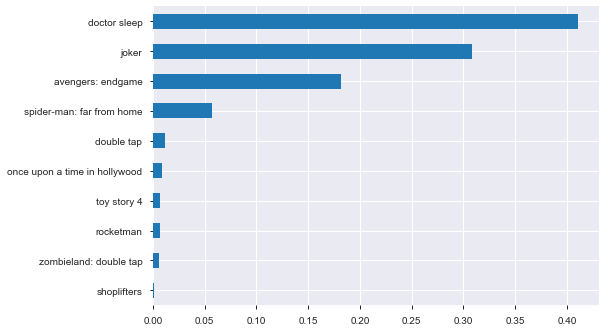

In [63]:
a.plot(kind='barh')

# Summary

In [230]:
df_summary_quality = pd.read_csv('evalution_quality.csv')

In [254]:
df_summary_quality_new_v2 = pd.DataFrame()
df_summary_quality_new_v2['Twitter_Quality_rank']=df_summary_quality['Quality'].rank()
df_summary_quality_new_v2['IMDB_Rating_rank']=df_summary_quality['Rating'].rank()
df_summary_quality_new_v2['Title']=df_summary_quality['Title']
df_summary_quality_new_v2.sort_values(by='Twitter_Quality_rank')
df_summary_quality_new_v2[['Title','Twitter_Quality_rank','IMDB_Rating_rank']]


Title  Twitter_Quality_rank  IMDB_Rating_rank
0                   Docker Sleep                   9.0               1.0
1                          Joker                   8.0               5.5
2              Avengers: Endgame                   7.0               3.5
3      Spider-Man: Far From Home                   6.0               9.0
4  Once Upon A Time In Hollywood                   5.0               2.0
5                    Toy Story 4                   4.0               3.5
6                      Rocketman                   3.0               5.5
7         Zombieland: Double Tap                   2.0               7.0
8                    Shoplifters                   1.0               8.0

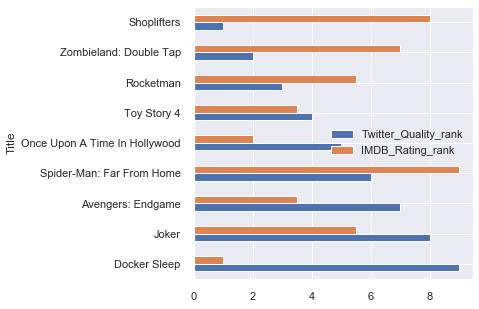

In [252]:
df_summary_quality_new_v2.plot.barh(x='Title')

In [234]:
df_summary_popularity = pd.read_csv('evaluations_popularity.csv')
df_summary_popularity['IMDb Popularity_X_adj'] = df_summary_popularity['IMDb Popularity_X'].apply(lambda x: (1/x))
df_summary_popularity

Title  IMDb Popularity_X  Twitter Popularity_Y  \
0                   Docker Sleep                  7              0.415700   
1                          Joker                  3              0.312045   
2              Avengers: Endgame                 29              0.184274   
3      Spider-Man: Far From Home                 60              0.058105   
4  Once Upon A Time In Hollywood                 10              0.008573   
5                    Toy Story 4                 63              0.007534   
6                      Rocketman                115              0.006711   
7         Zombieland: Double Tap                 43              0.006148   
8                    Shoplifters               1644              0.000909   

   IMDb Popularity_X_adj  
0               0.142857  
1               0.333333  
2               0.034483  
3               0.016667  
4               0.100000  
5               0.015873  
6               0.008696  
7               0.023256  
8               0.000608

In [255]:
df_summary_popularity_new_v2 = pd.DataFrame()
df_summary_popularity_new_v2['IMDB_Popularity']=df_summary_popularity['IMDb Popularity_X_adj'].rank()
df_summary_popularity_new_v2['Twitter_Popularity']=df_summary_popularity['Twitter Popularity_Y'].rank()
df_summary_popularity_new_v2['Title']=df_summary_popularity['Title']
df_summary_popularity_new_v2.sort_values(by='Twitter_Popularity',ascending=True)
df_summary_popularity_new_v2[['Title','Twitter_Popularity','IMDB_Popularity']]

Title  Twitter_Popularity  IMDB_Popularity
0                   Docker Sleep                 9.0              8.0
1                          Joker                 8.0              9.0
2              Avengers: Endgame                 7.0              6.0
3      Spider-Man: Far From Home                 6.0              4.0
4  Once Upon A Time In Hollywood                 5.0              7.0
5                    Toy Story 4                 4.0              3.0
6                      Rocketman                 3.0              2.0
7         Zombieland: Double Tap                 2.0              5.0
8                    Shoplifters                 1.0              1.0

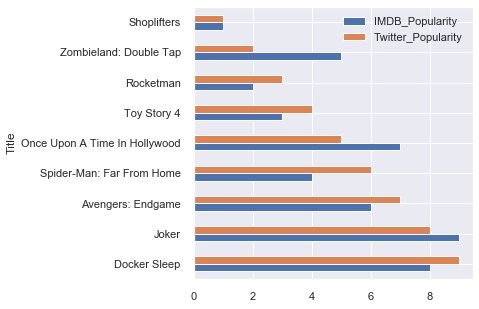

In [242]:
df_summary_popularity_new_v2.plot.barh(x='Title')